# Response time scale glacier model intercomparison

## Other response time estimates (e.g. comparison between models) ... UPDATED to FEB2024 with simulation year shifts....

In [1]:
import pandas as pd
import xarray as xr
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from help_functions import pal_models, model_order, d_reg_num_name, model_order_anonymous, compute_steady_state_yr


In [2]:
approach = '_via_5yravg'
DATE = 'Feb12_2024' #'Jun29' #'apr04' (has OGGM runaway effect of glaciers inside)

fill_option = 'repeat_last_101yrs'
ds_reg_yr_shift= xr.open_dataset(f'/home/www/lschuster/glacierMIP3_analysis/all_shifted_glacierMIP3_{DATE}_models_all_rgi_regions_sum_scaled_extended_{fill_option}{approach}.nc')

hue_order_anonymous = []

pal_models_l = []
hue_order = []
for m, p in zip(model_order, pal_models):
    if (m!='OGGM-VAS') and (m!='OGGM_v153') and (m!='Huss'):
        hue_order.append(m)
        pal_models_l.append(p)
for m in hue_order:
    hue_order_anonymous.append(model_order_anonymous[m])
pal_models = pal_models_l
pal_models = sns.color_palette(pal_models)

dict_model_col = {}
for c,m in zip(pal_models, hue_order):
    dict_model_col[m] = c


In [83]:
p_add = '_shifted'
min_perc_change = 25
roll_volume = 21
fpath = f'resp_time{p_add}_X%_threshold{min_perc_change}%_for_deltaT_rgi_reg_roll_volume_{roll_volume}yravg.csv'
pd_response_time_x_perc_loss_comp = pd.read_csv(fpath, index_col=[0])


**Check for how many experiments, we can estimate response time scales**

In [84]:
temp_ch_classes_num = {'-0.1°C-2.0°C (n=40)': 40,
                       '2.0°C-4.0°C (n=31)':31,
                       '4.0°C-7.0°C (n=9)':9
                      }

In [85]:
columns_sel = ['resp_time_-50%', 'resp_time_-80%', 'resp_time_-90%','diff_resp_time_-50%', 'diff_resp_time_-80%', 'diff_resp_time_-90%']

In [108]:
for r in pd_response_time_x_perc_loss_comp.rgi_reg.unique():
    for tc in pd_response_time_x_perc_loss_comp.temp_ch_classes.unique():
        _p_tc = pd_response_time_x_perc_loss_comp.loc[pd_response_time_x_perc_loss_comp.temp_ch_classes == tc]
        _s = _p_tc.loc[_p_tc.rgi_reg==r].groupby('model_author').count()['rgi_reg']
        try:
            np.testing.assert_allclose(_s.values, temp_ch_classes_num[tc], rtol=0.25)
        except:
            # if more than 25% of the experiments are missing for one model, we cannot do the model comparison correctly, in that case just remove the data from the entire 
            # temp. change bin... 
            pd_response_time_x_perc_loss_comp.loc[(pd_response_time_x_perc_loss_comp.temp_ch_classes == tc) & (pd_response_time_x_perc_loss_comp.rgi_reg==r),
                                                  columns_sel] = np.NaN
            print(r, tc, _s)
    if 'RGI' in r:
        pd_response_time_x_perc_loss_comp.loc[pd_response_time_x_perc_loss_comp.rgi_reg ==r, 'rgi_reg_sh'] = r[3:]
    else:
        pd_response_time_x_perc_loss_comp.loc[pd_response_time_x_perc_loss_comp.rgi_reg ==r, 'rgi_reg_sh'] = 'Global'
        

All -0.1°C-2.0°C (n=40) model_author
GLIMB             27
GloGEMflow        10
OGGM_v16          25
PyGEM-OGGM_v13    35
Name: rgi_reg, dtype: int64
RGI01 -0.1°C-2.0°C (n=40) model_author
GLIMB             18
GloGEMflow        27
OGGM_v16          24
PyGEM-OGGM_v13    31
Name: rgi_reg, dtype: int64
RGI02 -0.1°C-2.0°C (n=40) model_author
GLIMB             21
GloGEMflow        39
GloGEMflow3D      39
OGGM_v16          27
PyGEM-OGGM_v13    24
Name: rgi_reg, dtype: int64
RGI03 -0.1°C-2.0°C (n=40) model_author
GLIMB             28
GloGEMflow         1
OGGM_v16          14
PyGEM-OGGM_v13    40
Name: rgi_reg, dtype: int64
RGI03 2.0°C-4.0°C (n=31) model_author
GLIMB             31
GloGEMflow        21
OGGM_v16          30
PyGEM-OGGM_v13    31
Name: rgi_reg, dtype: int64
RGI05 -0.1°C-2.0°C (n=40) model_author
GLIMB             28
GloGEMflow        23
OGGM_v16          29
PyGEM-OGGM_v13    38
Name: rgi_reg, dtype: int64
RGI06 -0.1°C-2.0°C (n=40) model_author
GLIMB             33
GO              

In [109]:
pd_response_time_x_perc_loss_comp

,rgi_reg,model_author,temp_ch_ipcc,min_perc_change,shift_years,resp_time_-50%,resp_time_-80%,resp_time_-90%,diff_resp_time_-50%,diff_resp_time_-80%,diff_resp_time_-90%,temp_ch_classes,rgi_reg_sh,temp_ch_classes_sh
0,All,GLIMB,0.302892,25,1.0,NaN,NaN,NaN,NaN,NaN,NaN,-0.1°C-2.0°C (n=40),Global,-0.1°C-2.0°C
1,All,GLIMB,0.478289,25,1.0,NaN,NaN,NaN,NaN,NaN,NaN,-0.1°C-2.0°C (n=40),Global,-0.1°C-2.0°C
2,All,GLIMB,0.901467,25,1.0,NaN,NaN,NaN,NaN,NaN,NaN,-0.1°C-2.0°C (n=40),Global,-0.1°C-2.0°C
3,All,GLIMB,0.904940,25,1.0,NaN,NaN,NaN,NaN,NaN,NaN,-0.1°C-2.0°C (n=40),Global,-0.1°C-2.0°C
4,All,GLIMB,0.913313,25,1.0,NaN,NaN,NaN,NaN,NaN,NaN,-0.1°C-2.0°C (n=40),Global,-0.1°C-2.0°C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6010,RGI19,PyGEM-OGGM_v13,4.677751,25,1.0,123.0,275.0,374.0,22.0,25.0,-38.0,4.0°C-7.0°C (n=9),19,4.0°C-7.0°C
6011,RGI19,PyGEM-OGGM_v13,5.230543,25,1.0,116.0,267.0,377.0,30.0,40.5,10.0,4.0°C-7.0°C (n=9),19,4.0°C-7.0°C
6012,RGI19,PyGEM-OGGM_v13,5.840495,25,1.0,69.0,158.0,223.0,17.5,30.0,31.0,4.0°C-7.0°C (n=9),19,4.0°C-7.0°C
6013,RGI19,PyGEM-OGGM_v13,5.849305,25,1.0,93.0,204.0,277.0,18.0,34.5,37.5,4.0°C-7.0°C (n=9),19,4.0°C-7.0°C


In [110]:
pd_response_time_x_perc_loss_comp['temp_ch_classes_sh'] = ''

for t in ['-0.1°C-2.0°C (n=40)', '2.0°C-4.0°C (n=31)', '4.0°C-7.0°C (n=9)']:
    if t == '-0.1°C-2.0°C (n=40)':
        t_sh = '-0.1°C-2.0°C'
    elif t == '2.0°C-4.0°C (n=31)':
        t_sh = '2.0°C-4.0°C'
    elif t=='4.0°C-7.0°C (n=9)':
        t_sh = '4.0°C-7.0°C'
    condi = pd_response_time_x_perc_loss_comp.temp_ch_classes == t
    pd_response_time_x_perc_loss_comp.loc[condi,'temp_ch_classes_sh'] = t_sh

In [111]:
pd_response_time_x_perc_loss_comp

,rgi_reg,model_author,temp_ch_ipcc,min_perc_change,shift_years,resp_time_-50%,resp_time_-80%,resp_time_-90%,diff_resp_time_-50%,diff_resp_time_-80%,diff_resp_time_-90%,temp_ch_classes,rgi_reg_sh,temp_ch_classes_sh
0,All,GLIMB,0.302892,25,1.0,NaN,NaN,NaN,NaN,NaN,NaN,-0.1°C-2.0°C (n=40),Global,-0.1°C-2.0°C
1,All,GLIMB,0.478289,25,1.0,NaN,NaN,NaN,NaN,NaN,NaN,-0.1°C-2.0°C (n=40),Global,-0.1°C-2.0°C
2,All,GLIMB,0.901467,25,1.0,NaN,NaN,NaN,NaN,NaN,NaN,-0.1°C-2.0°C (n=40),Global,-0.1°C-2.0°C
3,All,GLIMB,0.904940,25,1.0,NaN,NaN,NaN,NaN,NaN,NaN,-0.1°C-2.0°C (n=40),Global,-0.1°C-2.0°C
4,All,GLIMB,0.913313,25,1.0,NaN,NaN,NaN,NaN,NaN,NaN,-0.1°C-2.0°C (n=40),Global,-0.1°C-2.0°C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6010,RGI19,PyGEM-OGGM_v13,4.677751,25,1.0,123.0,275.0,374.0,22.0,25.0,-38.0,4.0°C-7.0°C (n=9),19,4.0°C-7.0°C
6011,RGI19,PyGEM-OGGM_v13,5.230543,25,1.0,116.0,267.0,377.0,30.0,40.5,10.0,4.0°C-7.0°C (n=9),19,4.0°C-7.0°C
6012,RGI19,PyGEM-OGGM_v13,5.840495,25,1.0,69.0,158.0,223.0,17.5,30.0,31.0,4.0°C-7.0°C (n=9),19,4.0°C-7.0°C
6013,RGI19,PyGEM-OGGM_v13,5.849305,25,1.0,93.0,204.0,277.0,18.0,34.5,37.5,4.0°C-7.0°C (n=9),19,4.0°C-7.0°C


In [112]:
dt = pd_response_time_x_perc_loss_comp.loc[pd_response_time_x_perc_loss_comp.temp_ch_ipcc>=0.8]
dt.where(dt['resp_time_-50%']>600).dropna()

,rgi_reg,model_author,temp_ch_ipcc,min_perc_change,shift_years,resp_time_-50%,resp_time_-80%,resp_time_-90%,diff_resp_time_-50%,diff_resp_time_-80%,diff_resp_time_-90%,temp_ch_classes,rgi_reg_sh,temp_ch_classes_sh


In [113]:
dt.model_author.unique()

array(['GLIMB', 'GloGEMflow', 'OGGM_v16', 'PyGEM-OGGM_v13',
       'GloGEMflow3D', 'GO', 'CISM2', 'Kraaijenbrink'], dtype=object)

### first generally look at model differences in the response time scale

In [114]:
# only global models
glob_models = ['PyGEM-OGGM_v13','OGGM_v16','GLIMB', 'GloGEMflow']
_l_pd_response_time_x_perc_loss_comp_only_global_models = []
for m in glob_models:
    _p = pd_response_time_x_perc_loss_comp.loc[pd_response_time_x_perc_loss_comp.model_author==m].copy()
    _l_pd_response_time_x_perc_loss_comp_only_global_models.append(_p)
pd_response_time_x_perc_loss_comp_only_global_models = pd.concat(_l_pd_response_time_x_perc_loss_comp_only_global_models, axis=0)
#pd_response_time_x_perc_loss_comp_only_global_models = pd_response_time_x_perc_loss_comp_only_global_models.dropna()

In [115]:
for _r in d_reg_num_name.keys():
    pd_response_time_x_perc_loss_comp_only_global_models.loc[pd_response_time_x_perc_loss_comp_only_global_models.rgi_reg==f'RGI{_r}', 'rgi_reg_long'] = f'{d_reg_num_name[_r]} ({_r})'
pd_response_time_x_perc_loss_comp_only_global_models.loc[pd_response_time_x_perc_loss_comp_only_global_models.rgi_reg=='All', 'rgi_reg_long'] = 'Global'
pd_response_time_x_perc_loss_comp_only_global_models['absolute_diff_resp_time_-50%'] = np.absolute(pd_response_time_x_perc_loss_comp_only_global_models['diff_resp_time_-50%'])
pd_response_time_x_perc_loss_comp_only_global_models['absolute_diff_resp_time_-80%'] = np.absolute(pd_response_time_x_perc_loss_comp_only_global_models['diff_resp_time_-80%'])
pd_response_time_x_perc_loss_comp_only_global_models_median = pd_response_time_x_perc_loss_comp_only_global_models.groupby(['temp_ch_classes','rgi_reg','rgi_reg_long']).median().reset_index()

In [116]:
def get_glob_temp_exp(region='global'):
    pd_global_temp_exp_glac = pd.read_csv('../data/temp_ch_ipcc_ar6_isimip3b_glacier_regionally.csv', index_col = 0)
    _p = pd_global_temp_exp_glac.loc[pd_global_temp_exp_glac.region == region]
    _p = _p.groupby(['gcm','period_scenario']).mean()
    return _p
glob_temp_ch = get_glob_temp_exp(region='global')['temp_ch_ipcc'].values
from matplotlib.colors import LinearSegmentedColormap
from sklearn.preprocessing import MinMaxScaler
only_12_range = False
if only_12_range:
    colors_icci_l3 = ['#70B8FF', '#FABB00', '#F25100', '#D42300', '#B3001E', '#800040', '#550066', '#2B084D']
    cmap_icci_3 = LinearSegmentedColormap.from_list('bins_100', colors_icci_l3, N=1000)
    # IDEA --> Let's scale from 1.2 onwards
    scaler = MinMaxScaler()
    temp_ch_sel = np.arange(1.2,glob_temp_ch.max(),0.25)
    scaler.fit(temp_ch_sel.reshape(-1,1))
    cmap = cmap_icci_3
else:
    ## '#306BAF', '#1A488A', '#002966'
    ## '#4D8ED6',
    colors_full_temp_range = ['#002966', '#306BAF', '#70B8FF','#FABB00', '#F25100', '#D42300', '#B3001E', '#800040', '#550066', '#2B084D']
    cmap_full_temp_range = LinearSegmentedColormap.from_list('bins_100', colors_full_temp_range, N=1000)
    # IDEA --> Let's scale from the entire range onwards onwards
    scaler = MinMaxScaler()
    temp_ch_sel = np.arange(-0.36,glob_temp_ch.max(),0.25)# need to manually set the minimum to a lower value to have a light blue color at ~1.2°C
    scaler.fit(temp_ch_sel.reshape(-1,1))
    cmap = cmap_full_temp_range

norm = plt.Normalize(vmin=-0.36, vmax=glob_temp_ch.max()) # we need the -0.4 for the correct norm 
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
#sm.set_clim(glob_temp_ch.min(),glob_temp_ch.max())
# ok, both approaches work the same 
assert sm.cmap == cmap

t = 1.2
import matplotlib.colors as mcolors
# just want to make sure that 1.2°C is this color here: '#70B8FF'
hex_color = '#70B8FF'
rgba_color = mcolors.to_rgba(hex_color)
c1=sm.cmap(scaler.transform(np.array(t).reshape(-1,1))).squeeze()
c2=cmap(scaler.transform(np.array(t).reshape(-1,1))).squeeze()
np.testing.assert_allclose(c1,c2)
np.testing.assert_allclose(c1,rgba_color)

palette_l = []
for temp_ch_med_class in  pd_response_time_x_perc_loss_comp_only_global_models_median.groupby('temp_ch_classes').median()['temp_ch_ipcc'].values:
    print(temp_ch_med_class)

    palette_l.append(cmap(scaler.transform(np.array(temp_ch_med_class).reshape(-1,1))).squeeze())

1.636714986028974
2.7398348752990143
4.677751174879019


In [117]:
#pd_response_time_x_perc_loss_comp_only_global_models_median = pd_response_time_x_perc_loss_comp_only_global_models_median.dropna()

In [118]:
# find order for 2.0°C-4.0°C (n=31)
_sel_class3 = pd_response_time_x_perc_loss_comp_only_global_models_median.loc[pd_response_time_x_perc_loss_comp_only_global_models_median.temp_ch_classes == '4.0°C-7.0°C (n=9)']
_sel_class3_sorted = _sel_class3.sort_values(by='absolute_diff_resp_time_-50%',ascending=False)

**general response time scale model differences**
- 

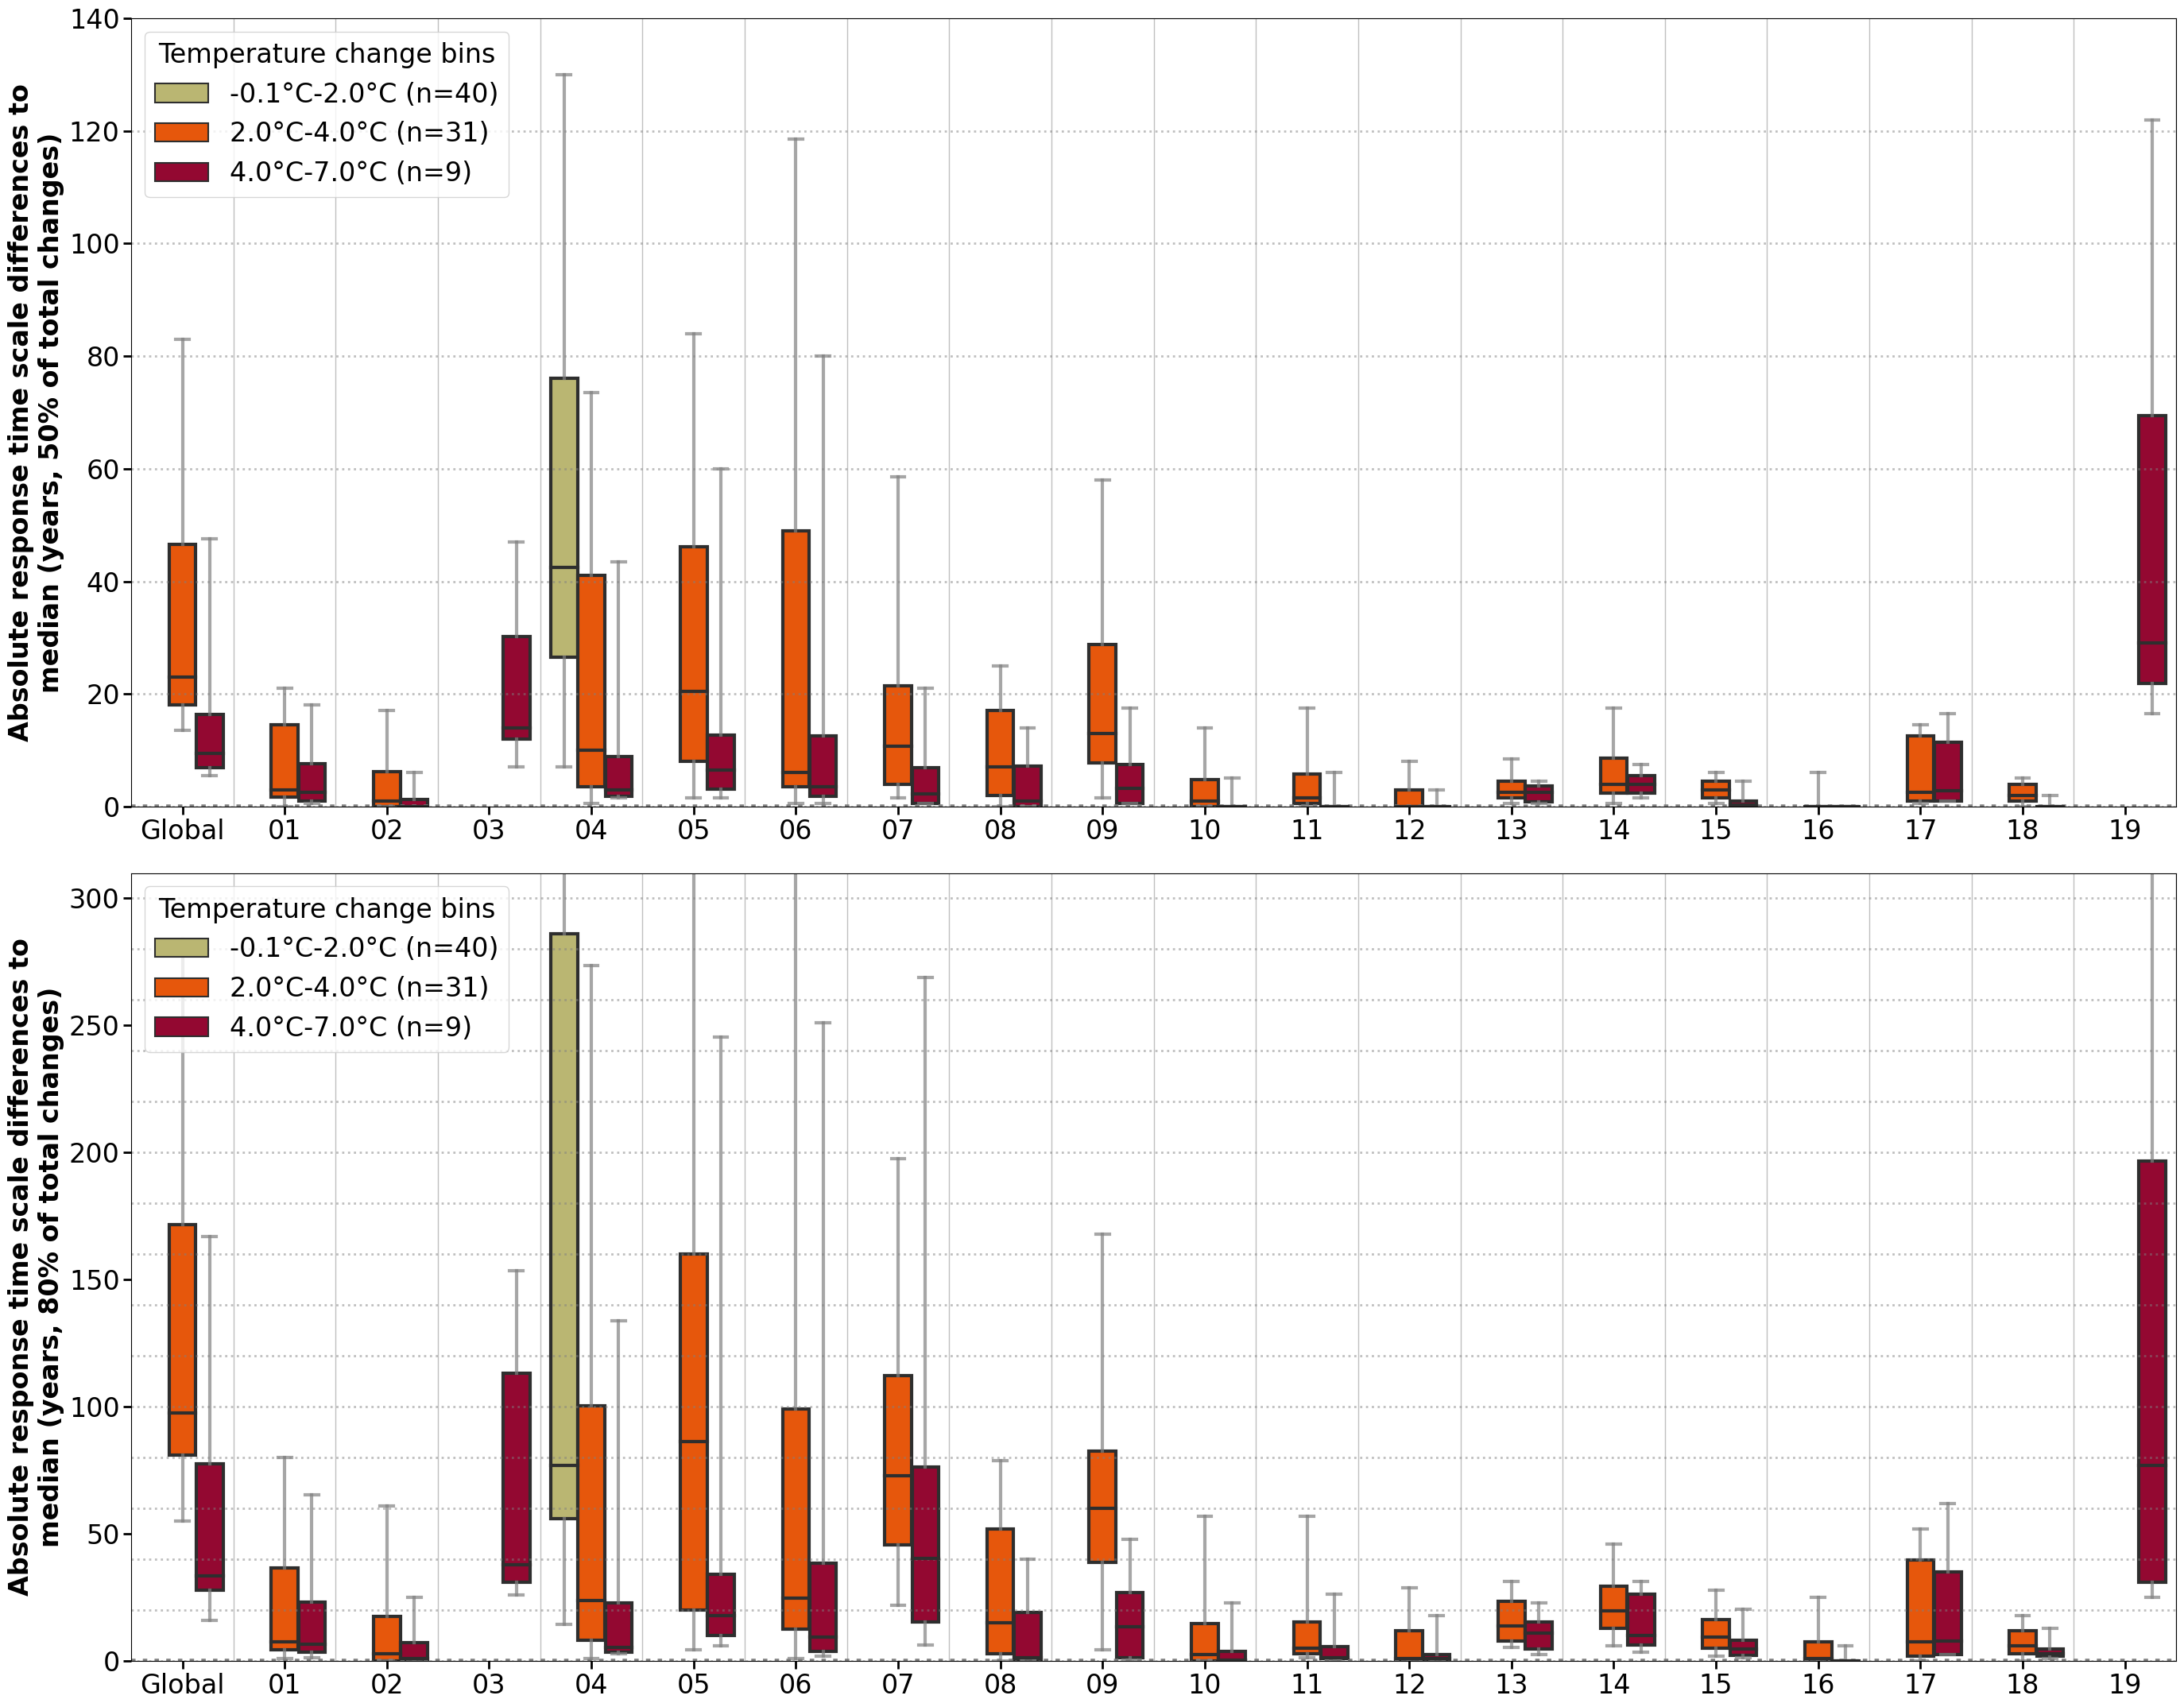

In [128]:
plt.rc('font', size=24)  
xlim1 = 140
fig, axs = plt.subplots(2,1,figsize=(28,22)) #, sharex=True)
ax = axs[0]
sns.boxplot(ax = ax,
    data=pd_response_time_x_perc_loss_comp_only_global_models, 
                x='rgi_reg_sh', y='absolute_diff_resp_time_-50%',
            #height=10,aspect=0.8,
            hue='temp_ch_classes', 
            palette=palette_l,
                  dodge = True, #hue='ssp',
            fliersize=0,
                  whis = [5,95], 
                  #order = list(_sel_class3_sorted.rgi_reg_long.values), # order after above 4°C
            #y = 'time', #hue_order = ['2040', '2100'],
            linewidth=3,
            capprops={'color':'grey', 'alpha':0.7},
            whiskerprops={'color':'grey', 'alpha':0.7},
            saturation = 0.9,
            #hue_order=_hue_order, palette=_pal_models,
           )#legend = True)#legend=legend)

ax.set_ylabel(f'Absolute response time scale differences to\nmedian (years, 50% of total changes)', weight='bold',fontsize=24)

#_,xlim1 = ax.get_xlim()
ax.set_ylim([0,xlim1])
for n in np.arange(0,xlim1,20):
    ax.axhline(n, color='grey', ls=':', alpha = 0.5, lw=2)
#ax.set_title(_t[len('temp_ch_classes = '):], weight='bold', fontsize=28)
ax.legend(title='Temperature change bins')


# same rel. to ref_period
xlim1 = 310
ax = axs[1]
sns.boxplot(ax = ax,
            data=pd_response_time_x_perc_loss_comp_only_global_models, 
                x='rgi_reg_sh', y='absolute_diff_resp_time_-80%',
            #height=10,aspect=0.8,
            hue='temp_ch_classes', 
            palette=palette_l,
                  dodge = True, #hue='ssp',
            fliersize=0,
                  whis = [5,95], 
                  #order = list(_sel_class3_sorted.rgi_reg_long.values), # order after above 4°C
            #y = 'time', #hue_order = ['2040', '2100'],
            linewidth=3,
            capprops={'color':'grey', 'alpha':0.7},
            whiskerprops={'color':'grey', 'alpha':0.7},
            saturation = 0.9,
            #hue_order=_hue_order, palette=_pal_models,
           )#legend = True)#legend=legend)
#ax.set_ylabel('Region', fontsize=24)

ax.set_ylabel(f'Absolute response time scale differences to\nmedian (years, 80% of total changes)', weight='bold',fontsize=24)

#_,xlim1 = ax.get_xlim()
ax.set_ylim([0,xlim1])
for n in np.arange(0,xlim1,20):
    ax.axhline(n, color='grey', ls=':', alpha = 0.5, lw=2)
#ax.set_title(_t[len('temp_ch_classes = '):], weight='bold', fontsize=28)
ax.legend(title='Temperature change bins', loc = 'upper left')

_med_resp_time = pd_response_time_x_perc_loss_comp_only_global_models.groupby(['temp_ch_classes','rgi_reg']).median()[f'resp_time_-80%']
for e,rgi_reg in enumerate(pd_response_time_x_perc_loss_comp_only_global_models.rgi_reg.unique()):
    r = _med_resp_time.loc[('2.0°C-4.0°C (n=31)',rgi_reg)]
    if np.isnan(r):
        pass
    else:
        if rgi_reg == 'All' and e==0:
            text = f'{int(r)}\nyears\n(median)'
        else:
            text = f'{int(r)}'                        
        #ax.text(e,xlim1*0.99,f'{text}', color = 'dimgrey', fontsize=22, ha='center', va='top')    

#ax.get_legend().remove() #plt.legend(title='Temperature change bins')
for ax in axs:
    ax.tick_params(axis='both', which='major', width=2, length=7)
    ax.tick_params(axis='both', which='minor', width=1, length=5)
    ax.set_xlabel('')
    ax.axhline(0, color='grey', ls=':', alpha = 1, lw=4)
    for vl in np.arange(0.5,20,1):
        ax.axvline(vl, color='grey', ls='-', alpha = 0.5, lw=1)


plt.tight_layout()
plt.savefig('figures_partB/response_time_scale/general_model_differences_response_time_scale_boxplots_only_global_models_landscape.png')
plt.savefig('figures_partB/response_time_scale/general_model_differences_response_time_scale_boxplots_only_global_models_landscape.pdf')

#plt.savefig('figures_partB/glacier_model_ss_differences/model_differences_steady_state_overall_boxplots.pdf')

- For all regions except for Arctic Canada South, and for climate scenarios with temperature changes below 2°C, there are more than 25% of glacier model experiments for at least one glacier model where the conditions to estimate a response time scale are not fulfilled. Thus, we only show response time scale estimates for Arctic Canada S under the small temperature changes. Under 2.0°C-4.0°C, the two slowes regions (Subantarctic and Antarctic Islands and Arctica Canada N) also do not fulfill the criteria to estimate response times. 
- For climate change scenarios above 2°C, the largest response time scale glacier model differences are in Subantarctic and Antarctic Islands (19), Arctic Canada N (03), Globally and Greenland Periphery  (05). The smallest differences are in the fast responding steep mid-latitude regions that basically deglaciate under very warm 4.0°C-7.0°C scenarios. Overall the fastest is in the Low Latitudes.  
- Globally and in all regions, the response time scale model differences diminish for warmer temperatures. Only in Arctic Canada N (03), the model differences are larger for climate scenarios with temperature changes of 2.0°C to 4.0°C compared to -0.1 to 2.0°C

--> probably the response time scale glacier model differences are related to the glacier surface slope...

same for portrait: 

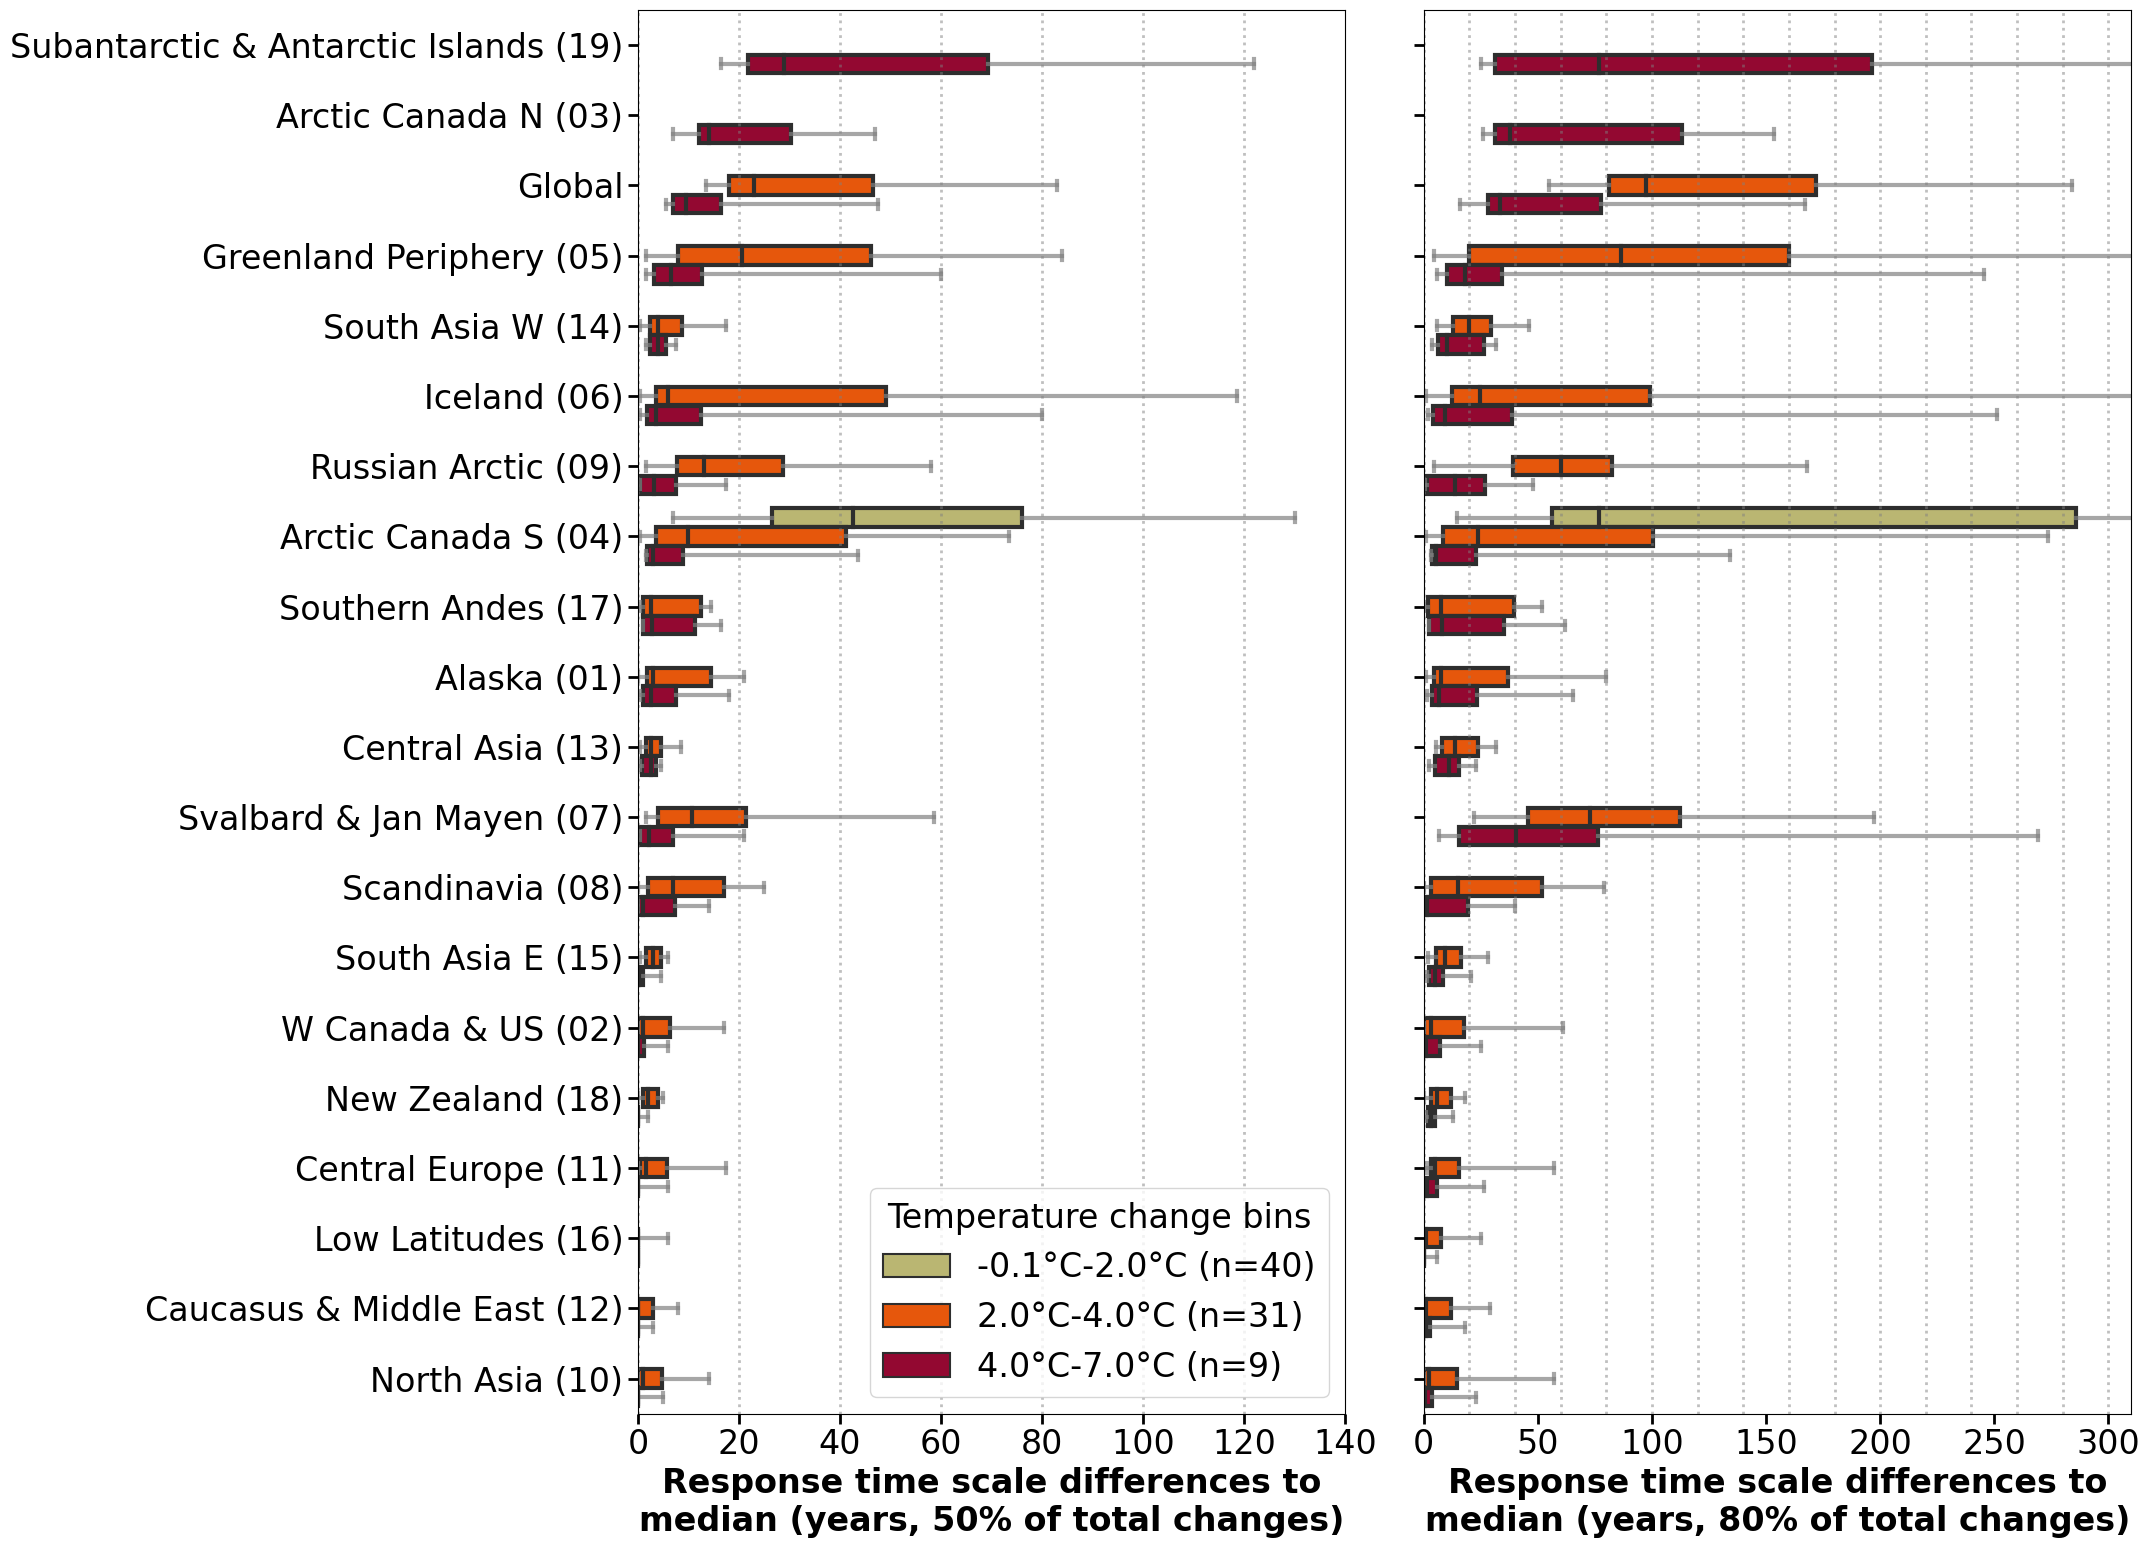

In [122]:
plt.rc('font', size=24)  
xlim1 = 140
fig, axs = plt.subplots(1,2,figsize=(22,16), sharey=True)
ax = axs[0]
sns.boxplot(ax = ax,
    data=pd_response_time_x_perc_loss_comp_only_global_models, 
                y='rgi_reg_long', x='absolute_diff_resp_time_-50%',
            #height=10,aspect=0.8,
            hue='temp_ch_classes', 
            palette=palette_l,
                  dodge = True, #hue='ssp',
            fliersize=0,
                  whis = [5,95], 
                  order = list(_sel_class3_sorted.rgi_reg_long.values), # order after above 4°C
            #y = 'time', #hue_order = ['2040', '2100'],
            linewidth=3,
            capprops={'color':'grey', 'alpha':0.7},
            whiskerprops={'color':'grey', 'alpha':0.7},
            saturation = 0.9,
            #hue_order=_hue_order, palette=_pal_models,
           )#legend = True)#legend=legend)

ax.set_xlabel(f'Response time scale differences to\nmedian (years, 50% of total changes)', weight='bold',fontsize=24)

#_,xlim1 = ax.get_xlim()
ax.set_xlim([0,xlim1])
for n in np.arange(0,xlim1,20):
    ax.axvline(n, color='grey', ls=':', alpha = 0.5, lw=2)
#ax.set_title(_t[len('temp_ch_classes = '):], weight='bold', fontsize=28)
ax.legend(title='Temperature change bins')


# same rel. to ref_period
xlim1 = 310
ax = axs[1]
sns.boxplot(ax = ax,
            data=pd_response_time_x_perc_loss_comp_only_global_models, 
                y='rgi_reg_long', x='absolute_diff_resp_time_-80%',
            #height=10,aspect=0.8,
            hue='temp_ch_classes', 
            palette=palette_l,
                  dodge = True, #hue='ssp',
            fliersize=0,
                  whis = [5,95], 
                  order = list(_sel_class3_sorted.rgi_reg_long.values), # order after above 4°C
            #y = 'time', #hue_order = ['2040', '2100'],
            linewidth=3,
            capprops={'color':'grey', 'alpha':0.7},
            whiskerprops={'color':'grey', 'alpha':0.7},
            saturation = 0.9,
            #hue_order=_hue_order, palette=_pal_models,
           )#legend = True)#legend=legend)
#ax.set_ylabel('Region', fontsize=24)

ax.set_xlabel(f'Response time scale differences to\nmedian (years, 80% of total changes)', weight='bold',fontsize=24)

#_,xlim1 = ax.get_xlim()
ax.set_xlim([0,xlim1])
for n in np.arange(0,xlim1,20):
    ax.axvline(n, color='grey', ls=':', alpha = 0.5, lw=2)
#ax.set_title(_t[len('temp_ch_classes = '):], weight='bold', fontsize=28)
ax.get_legend().remove() #plt.legend(title='Temperature change bins')
for ax in axs:
    ax.tick_params(axis='both', which='major', width=2, length=7)
    ax.tick_params(axis='both', which='minor', width=1, length=5)
    ax.set_ylabel('')

plt.tight_layout()
plt.savefig('figures_partB/response_time_scale/general_model_differences_response_time_scale_boxplots_only_global_models.png')
plt.savefig('figures_partB/response_time_scale/general_model_differences_response_time_scale_boxplots_only_global_models.pdf')

#plt.savefig('figures_partB/glacier_model_ss_differences/model_differences_steady_state_overall_boxplots.pdf')

In [123]:
# compute amount of RGI regions per model 
pd_regional_sum_initial_models = ds_reg_yr_shift.sel(year_after_2020=0).to_dataframe() ### USE SHIFTED STUFF HERE!!!
pd_regional_sum_initial_models = pd_regional_sum_initial_models.reset_index()
#pd_reg_models = pd_reg_models.dropna()
pd_reg_models_count = pd_regional_sum_initial_models.groupby(['rgi_reg', 'model_author'])['volume_m3'].count().reset_index()
pd_reg_models_count = pd_reg_models_count.rename(columns={'volume_m3':'n_experiments'})
total_count= pd_reg_models_count.groupby('model_author').sum()

labels_l = []
labels_l_anonym = []
for j,n in enumerate((total_count/80).round(0).astype(int).loc[hue_order].values.squeeze()):
    if n==1:
        label = f'{hue_order[j]} ({n} region)'
        label_a = f'{hue_order_anonymous[j]} ({n} region)' 
    else:
        label = f'{hue_order[j]} ({n} regions)'
        label_a = f'{hue_order_anonymous[j]} ({n} regions)'
    labels_l.append(label)
    labels_l_anonym.append(label_a)
    


## global and regional model differences just between 2.0 and 4.0°C

In [124]:
pd_response_time_x_perc_loss_comp.loc[(pd_response_time_x_perc_loss_comp.rgi_reg=='RGI19')&(pd_response_time_x_perc_loss_comp.temp_ch_classes=='2.0°C-4.0°C (n=31)')].dropna()

,rgi_reg,model_author,temp_ch_ipcc,min_perc_change,shift_years,resp_time_-50%,resp_time_-80%,resp_time_-90%,diff_resp_time_-50%,diff_resp_time_-80%,diff_resp_time_-90%,temp_ch_classes,rgi_reg_sh,temp_ch_classes_sh


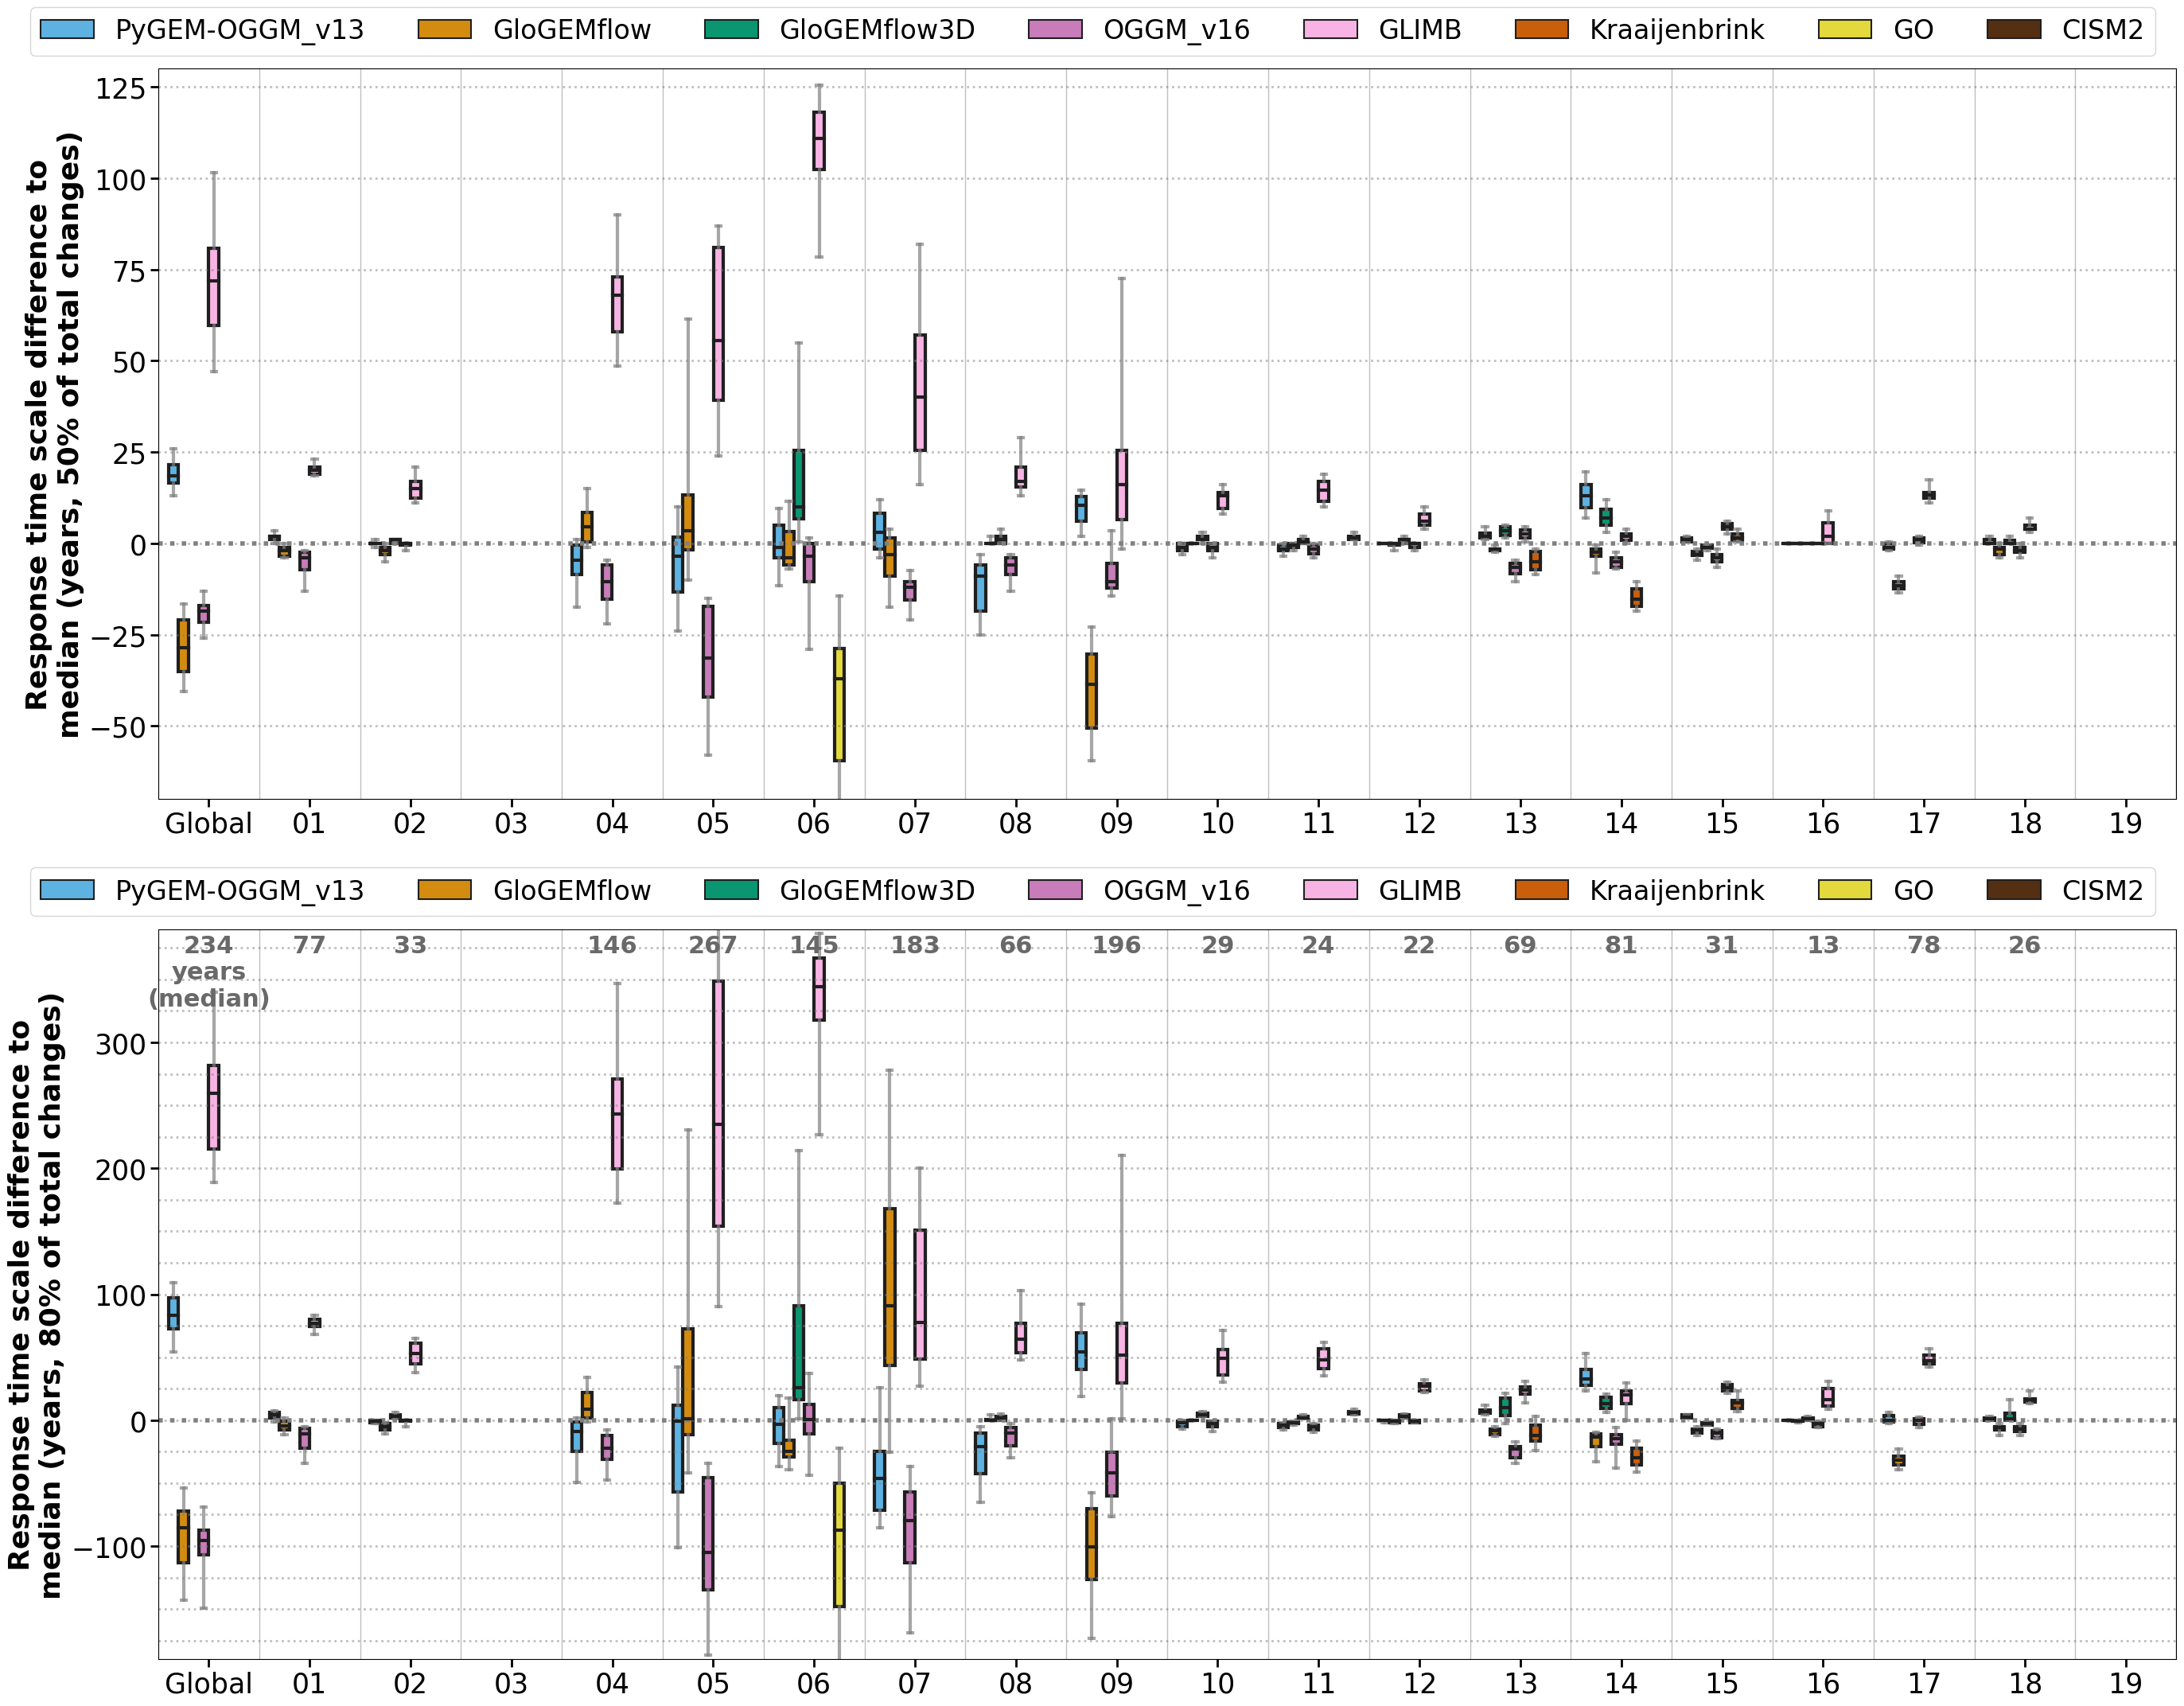

In [127]:
pd_response_time_x_perc_loss_comp_sel = pd_response_time_x_perc_loss_comp.loc[pd_response_time_x_perc_loss_comp.temp_ch_classes == '2.0°C-4.0°C (n=31)']
plt.rc('font', size=25)  
xlim1 = 140
fig, axs = plt.subplots(2,1,figsize=(30,22)) #, sharex=True)
ax = axs[0]
sns.boxplot(ax = ax,
    data=pd_response_time_x_perc_loss_comp_sel, 
                x='rgi_reg_sh', y='diff_resp_time_-50%',
            #height=10,aspect=0.8,
            hue='model_author', 
            palette=pal_models, saturation=0.9,
                       hue_order=hue_order, dodge = True, #hue='ssp',
                                            fliersize=0, whis = [5,95], 
                                            #y = 'time', #hue_order = ['2040', '2100'],
                                            linewidth=3,
                                            capprops={'color':'grey', 'alpha':0.7},
                                            whiskerprops={'color':'grey', 'alpha':0.7})

ax.set_ylabel(f'Response time scale difference to\nmedian (years, 50% of total changes)', weight='bold',fontsize=26)

#_,xlim1 = ax.get_xlim()
ylim0, ylim1 = -70, 130
#ylim0, ylim1 = -190, 350
ax.set_ylim([ylim0,ylim1])
for n in np.arange(-50,ylim1,25):
    ax.axhline(n, color='grey', ls=':', alpha = 0.5, lw=2)
#ax.set_title(_t[len('temp_ch_classes = '):], weight='bold', fontsize=28)
ax.legend(ncol=8, bbox_to_anchor=(-0.07,1), loc = 'lower left', fontsize=24)


# same rel. to ref_period
ax = axs[1]
sns.boxplot(ax = ax,
            data=pd_response_time_x_perc_loss_comp_sel, 
                x='rgi_reg_sh', y='diff_resp_time_-80%',
            #height=10,aspect=0.8,
            hue='model_author', 
            palette=pal_models, saturation=0.9,
                       hue_order=hue_order, dodge = True, #hue='ssp',
                                            fliersize=0, whis = [5,95], 
                                            #y = 'time', #hue_order = ['2040', '2100'],
                                            linewidth=3,
                                            capprops={'color':'grey', 'alpha':0.7},
                                            whiskerprops={'color':'grey', 'alpha':0.7})
#ax.set_ylabel('Region', fontsize=24)

ax.set_ylabel(f'Response time scale difference to\nmedian (years, 80% of total changes)', weight='bold',fontsize=26)


    
#ylim0, ylim1 = -70, 130
ylim0, ylim1 = -190, 390
ax.set_ylim([ylim0,ylim1])
for n in np.arange(-175,ylim1,25):
    ax.axhline(n, color='grey', ls=':', alpha = 0.5, lw=2)
    
#ax.set_title(_t[len('temp_ch_classes = '):], weight='bold', fontsize=28)
ax.legend(ncol=8, bbox_to_anchor=(-0.07,1), loc = 'lower left', fontsize=24)

_med_resp_time = pd_response_time_x_perc_loss_comp_sel.groupby(['temp_ch_classes','rgi_reg']).median()[f'resp_time_-80%']
for e,rgi_reg in enumerate(pd_response_time_x_perc_loss_comp_sel.rgi_reg.unique()):
    r = _med_resp_time.loc[('2.0°C-4.0°C (n=31)',rgi_reg)]
    if np.isnan(r):
        pass
    else:
        if rgi_reg == 'All' and e==0:
            text = f'{int(r)}\nyears\n(median)'
        else:
            text = f'{int(r)}'                        
        ax.text(e,ylim1*0.99,f'{text}', color = 'dimgrey', fontsize=22, ha='center', va='top', weight='bold', zorder=10)    

#ax.get_legend().remove() #plt.legend(title='Temperature change bins')
for ax in axs:
    ax.tick_params(axis='both', which='major', width=2, length=7)
    ax.tick_params(axis='both', which='minor', width=1, length=5)
    ax.set_xlabel('')
    ax.axhline(0, color='grey', ls=':', alpha = 1, lw=4)
    for vl in np.arange(0.5,20,1):
        ax.axvline(vl, color='grey', ls='-', alpha = 0.5, lw=1)


plt.tight_layout()
plt.savefig('figures_partB/response_time_scale/glacier_model_differences_response_time_scale_boxplots_2.0°C-4.0°C_landscape.png')
plt.savefig('figures_partB/response_time_scale/glacier_model_differences_response_time_scale_boxplots_2.0°C-4.0°C_landscape.pdf')

#plt.savefig('figures_partB/glacier_model_ss_differences/model_differences_steady_state_overall_boxplots.pdf')

**Analysis**
- From the global glacier models, for 80% of total changes, GLIMB responds the slowest globally and in all regions except for two regions. In Svalbard & Jan-Mayen, GLoGEMFLow is similarly slow or slower responding and in South Asia W, PyGEM is slower. 
- From the global glacier models, OGGM v161 response time scales are similar to other models or mostly faster for many regions. However, GloGEMflow responds fastest in W Canada & US, Russian Arctic and Southern Andes. PyGEM responds fastest in Scandinavia. From the regional glacier models, in Iceland, the GO model that is only available for Iceland is the fastest glacier model for temperature changes between 2.0 to 4.0°C, and in South Asia W. The Kraaijenbrink et al glacier model is the fastest glacier model for temperature changes between 2.0 to 4.0°C in South Asia W.

- For most cases, the tendencies remain similar betweeen 50% of total changes compared to the above described 80% of total changes. However in some regions the tendencies change. For 80% of total changes, OGGM v161 is slightly faster under 2.0 to 4.0°C climate scenarios, but for 50% of total changes, the global response time scale is fastest for GloGEMflow. In Svalbard & Jan-Mayen, for 80% of total changes GloGEMflow is slowest, but for 50% of total changes it was faster than the median response time scale. Only for 50% of the total changes, in Central Asia and South Asia W, PyGEM and GloGEMFlow3D are slighlty slower than GLIMB.

- GloGEMFlow3D always responds slower than GloGEMflow. 
- The response time scales of CISM2 (only available in Central Europe) are similar to the median glacier model response time scale

---
- here analysed for 80% of changes: For most glacier models and regions, the differences to the median response time scale diminish for climate scenarios above 4°C. However,  the glacier model response time differences to the median is more positive for higher temprerature for the GLIMB model in the Southern Andes and for GloGEMflow in Svalbard and Jan Mayen. 
    - for only 50% of the changes. The response time difference to the median is only more positive for higher temperatures for the GLIMB model in Central Asia, South Asia W, and SOurthern Andes. 
    - to check: are these the only models where glacier mass remains in these regions for above 4°C???

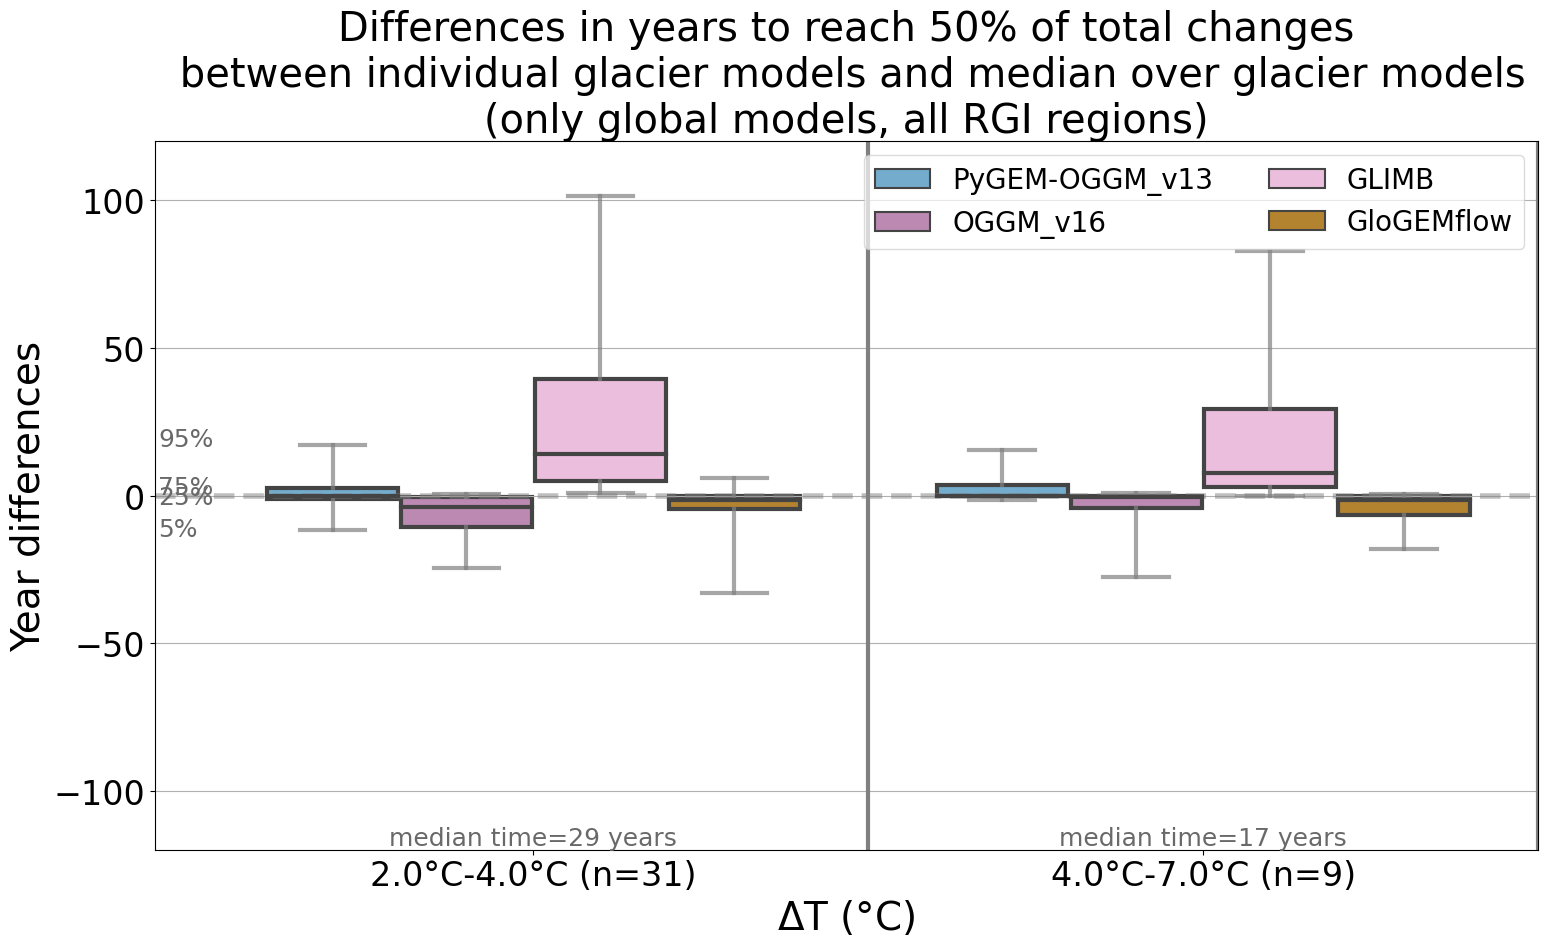

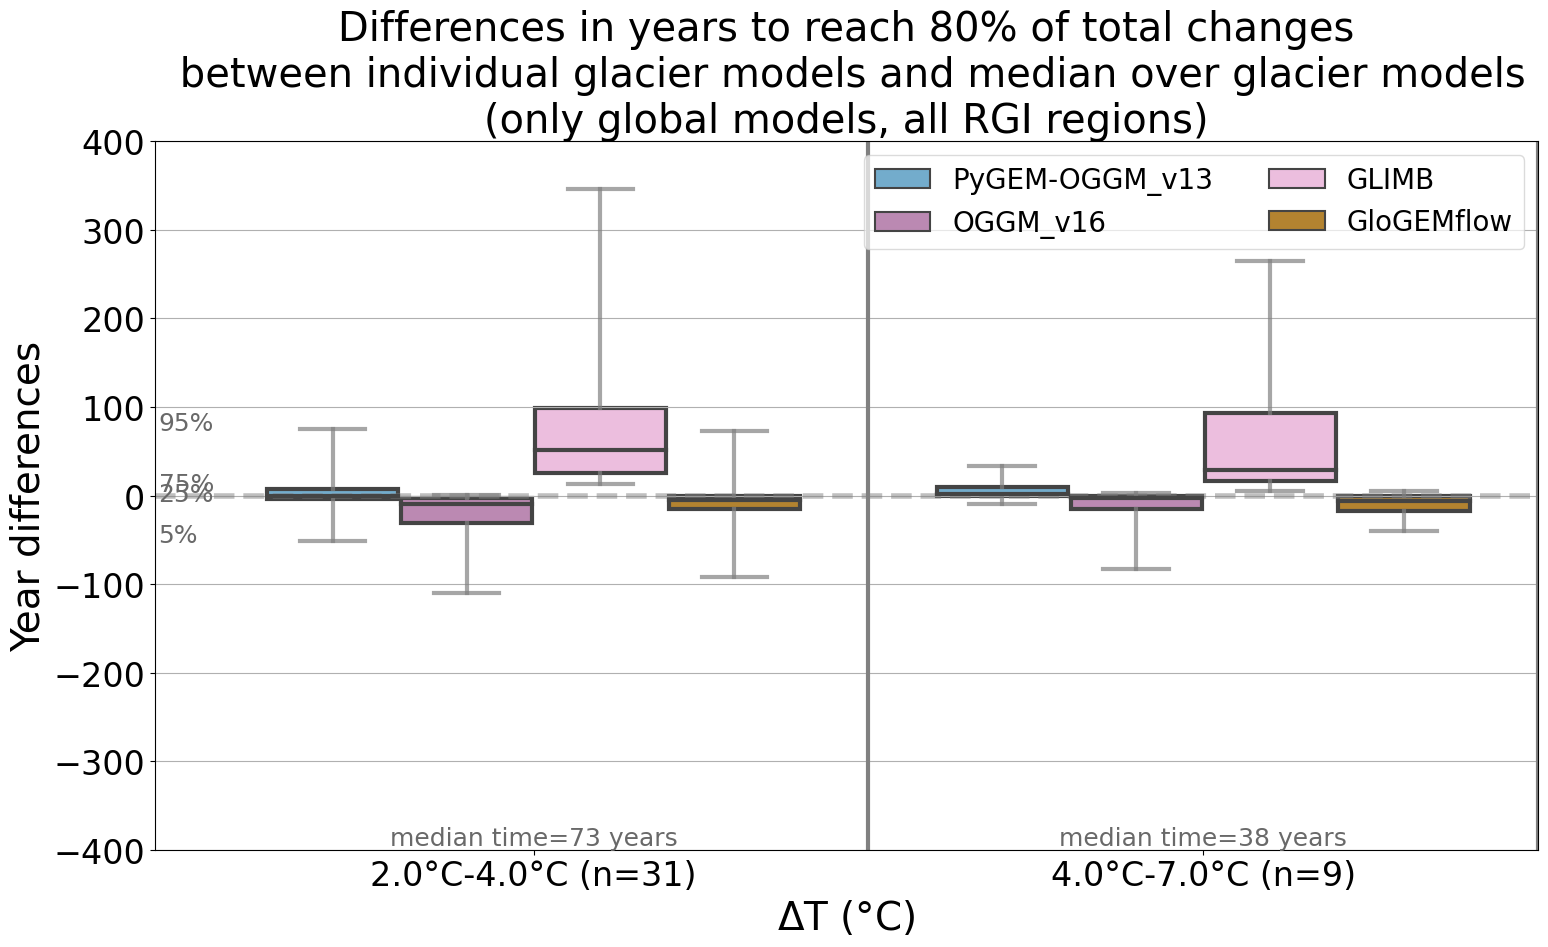

In [129]:
#### variant globally all together 
only_global_models = True
_pd_response_time_x_perc_loss_comp = pd_response_time_x_perc_loss_comp.copy()
_pd_response_time_x_perc_loss_comp.index = _pd_response_time_x_perc_loss_comp.model_author
if only_global_models:
    _pd_response_time_x_perc_loss_comp = _pd_response_time_x_perc_loss_comp.loc[glob_models]
    _pal_models = []
    for m in glob_models:
        _pal_models.append(dict_model_col[m])
    _hue_order = glob_models
    add = '_only_global_models'
else:
    _pal_models = pal_models
    _hue_order = hue_order
    add = ''

_pd_response_time_x_perc_loss_comp = _pd_response_time_x_perc_loss_comp.reset_index(drop=True)   

# let's remove the -0.1°C-2.0°C as it only works for RGI04...
_pd_response_time_x_perc_loss_comp = _pd_response_time_x_perc_loss_comp.loc[_pd_response_time_x_perc_loss_comp.temp_ch_classes!='-0.1°C-2.0°C (n=40)']
for anonym in ['']: #, '_anonym']:
    for p in [-50,-80]: #,-90]:
        plt.figure(figsize=(16,10))
        plt.rc('font', size=24)  
        sns.boxplot(data=_pd_response_time_x_perc_loss_comp, hue='model_author', y=f'diff_resp_time_{p}%',
                    x='temp_ch_classes', palette=_pal_models, saturation=0.6,
                       hue_order=_hue_order, dodge = True, #hue='ssp',
                                        fliersize=0, whis = [5,95], 
                                        #y = 'time', #hue_order = ['2040', '2100'],
                                        linewidth=3,
                                        capprops={'color':'grey', 'alpha':0.7},
                                        whiskerprops={'color':'grey', 'alpha':0.7},)
        plt.grid(axis='y')
        if only_global_models:
            plt.title(f'Differences in years to reach {-p}% of total changes\n between individual glacier models and median over glacier models\n(only global models, all RGI regions)')
        else:
            plt.title(f'Differences in years to reach {-p}% of total changes\n between individual glacier models and median over glacier models (all RGI regions)')
        plt.ylabel(f'Year differences', fontsize=28)
        plt.xlabel(r'$\Delta$T (°C)', fontsize=28)
        for f in np.arange(0.5,2,1):
            plt.axvline(f, color= 'grey', ls='-', lw=3)

        ax = plt.gca()
        _leg = ax.get_legend()
        handles, labels = ax.get_legend_handles_labels()
        _leg.remove()
        #n = len(hue_order)
        
        if anonym=='_anonym':
            labels_l_anonym = []
            for m in _hue_order:
                labels_l_anonym.append(model_order_anonymous[m])
            leg = ax.legend(handles, labels_l_anonym, #title=f'{n} models',
                            loc='upper right', framealpha = 0.7, ncol=2, fontsize=20)
        else:
            leg = ax.legend(handles, labels, #title=f'{n} models',
                            loc='upper right', framealpha = 0.7, ncol=2, fontsize=20)
        if p==-50:
            plt.ylim([-120, 120])
        else:
            plt.ylim([-400, 400])

        qs = _pd_response_time_x_perc_loss_comp.groupby(['model_author',
                                                        'temp_ch_classes'])[f'diff_resp_time_{p}%'].quantile([0.05,0.25,
                                                                                                              0.75,0.95]).loc[('PyGEM-OGGM_v13', '2.0°C-4.0°C (n=31)')].values
        for pp,q in enumerate(qs):
            perci = [5,25,75,95][pp]
            if perci <=75:
                ax.text(-0.56,q-2,f'{perci}%', color = 'dimgrey', fontsize=18)
            else:
                ax.text(-0.56,q*0.98,f'{perci}%', color = 'dimgrey', fontsize=18)
        med_resp_time_temp_ch_classes = _pd_response_time_x_perc_loss_comp.groupby('temp_ch_classes').median()[f'resp_time_{p}%']
        plt.axhline(0, ls='--', color='grey', lw=4, alpha = 0.5)

        for e,r in enumerate(med_resp_time_temp_ch_classes.values):
            text = f'median time={int(r)} years'
            if p==-50:
                ax.text(e,0.-120,f'{text}', color = 'dimgrey', fontsize=18, ha='center', va='bottom', zorder=6)
            else:
                ax.text(e,-400,f'{text}', color = 'dimgrey', fontsize=18, ha='center', va='bottom', zorder=6)


        xlim0,xlim1 = ax.get_xlim()
        plt.xlim([-0.565,xlim1])
        plt.tight_layout()
        plt.savefig(f'figures_partB/response_time_scale/3_response_time_glacier_model_diff_boxplot_5000yrs{anonym}_{p}%change{add}_{DATE}.png')

### regional 

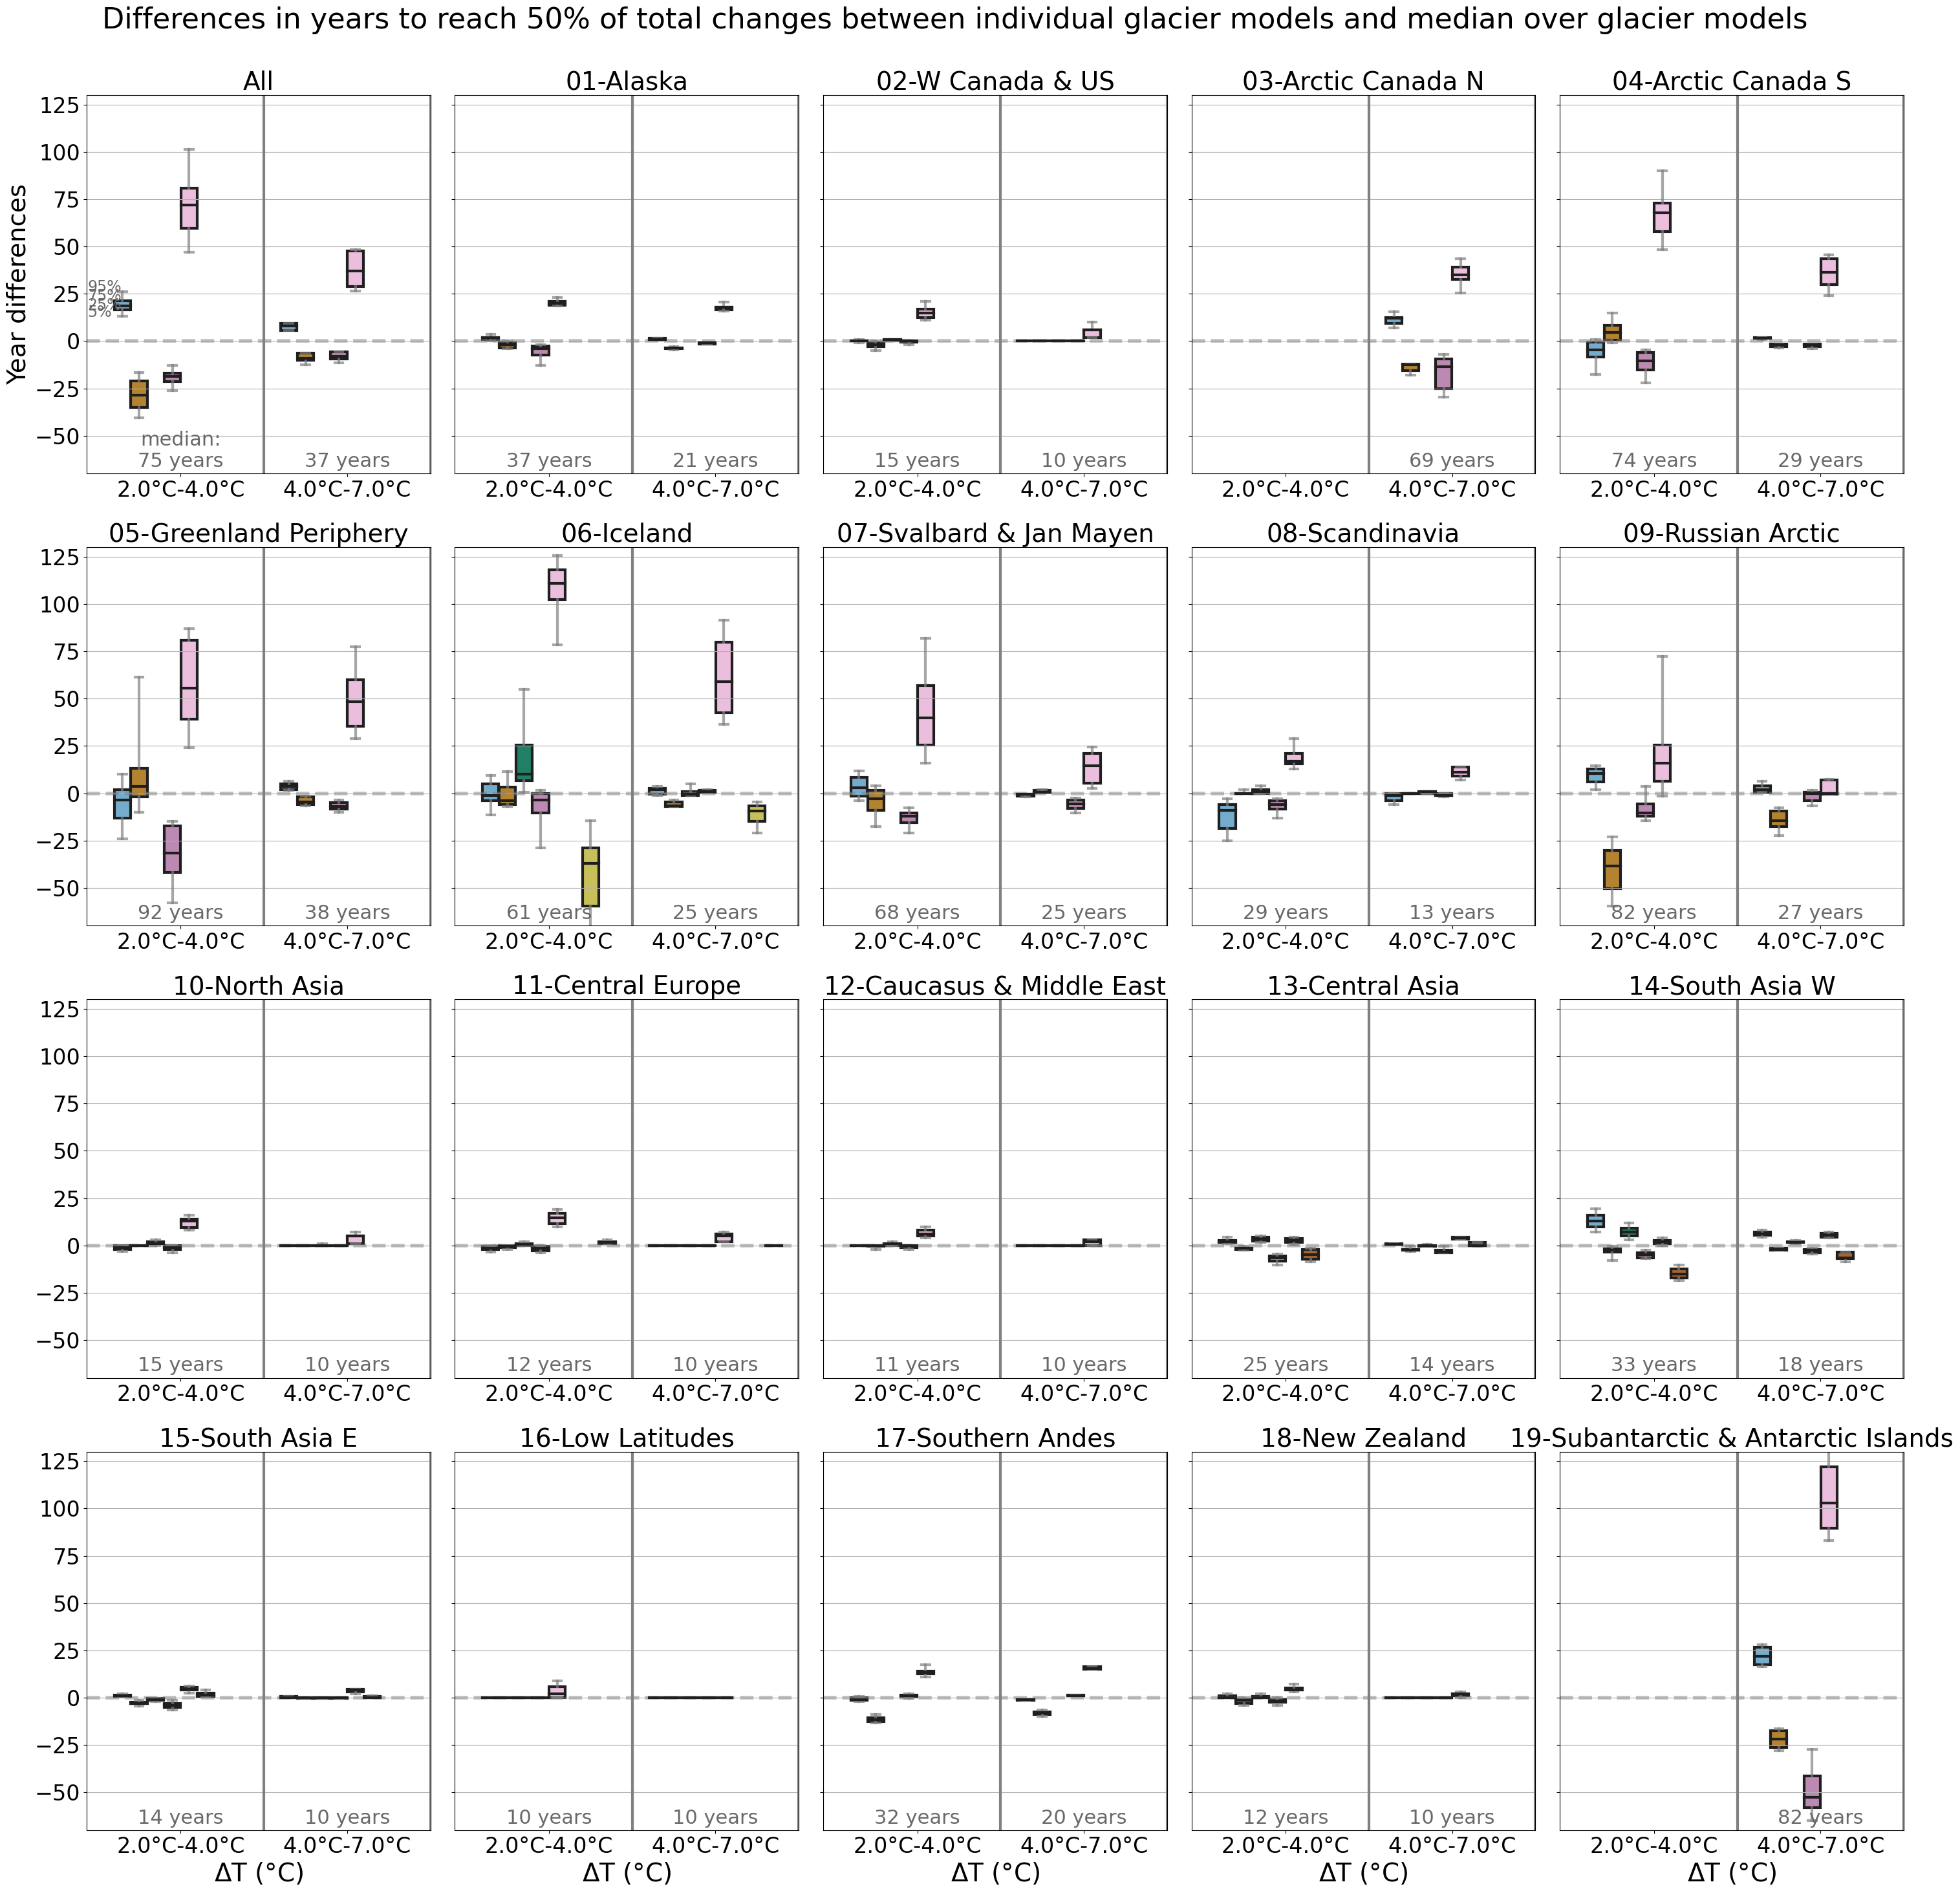

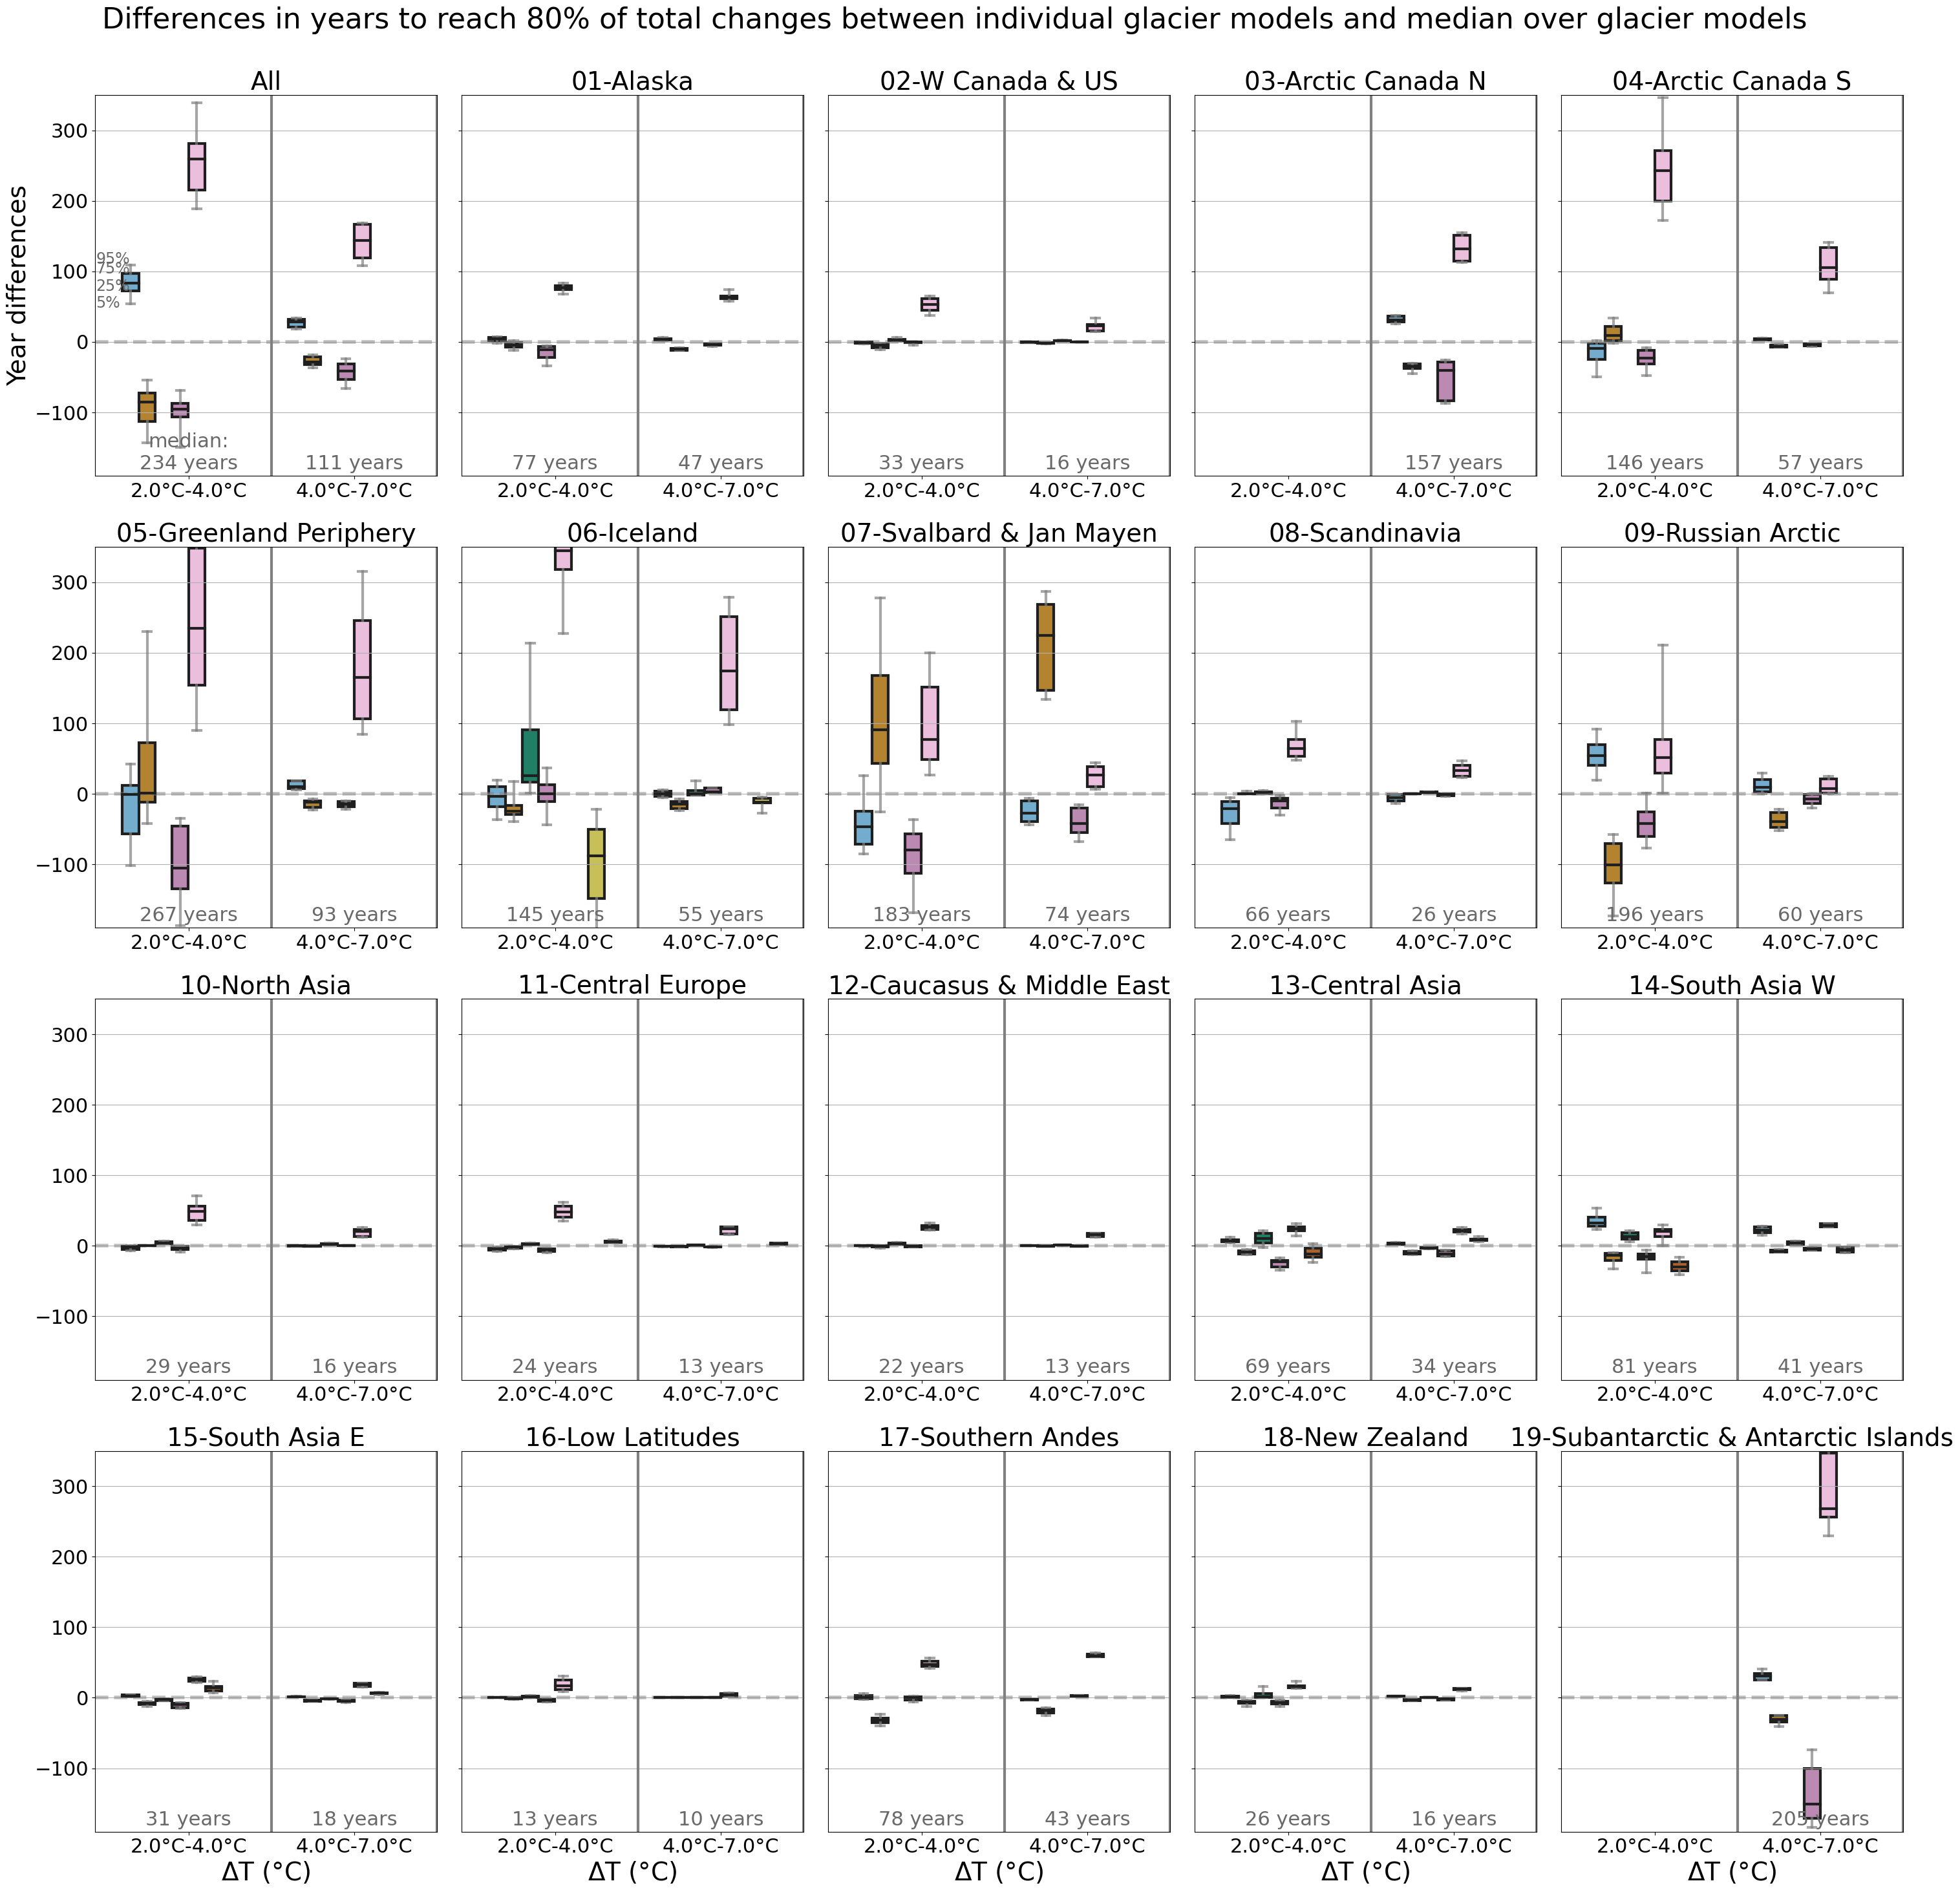

In [130]:

subplots = True
for anonym in ['']: #,'_anonym']: # --> would need to update the code to have the right legend!!!
    for p in [-50,-80]: #-50,-80,-90
        if subplots:
            fig, axs = plt.subplots(4,5,figsize=(30,30), sharey=True) #, sharey=True) #, sharey=True) #, sharey='row') #, sharex=True)
            plt.suptitle(f'Differences in years to reach {-p}% of total changes between individual glacier models and median over glacier models\n', fontsize=32)
            plt.rc('font', size=22)  
            axs = axs.flatten()
            #axs[-1].axis('off')

        else:
            plt.rc('font', size=24)  
        for j,r in enumerate(['All'] + list(ds_reg_yr_shift.rgi_reg.values)):
            if r == 'All':
                rgi_reg = 'All'
                rgi_reg_long = r
            else:
                rgi_reg = 'RGI'+r
                rgi_reg_long = f'{r}-{d_reg_num_name[r]}'

            pd_response_time_x_perc_loss_comp_rgi_reg = pd_response_time_x_perc_loss_comp.loc[pd_response_time_x_perc_loss_comp.rgi_reg==rgi_reg]#.dropna()
            # let's remove the -0.1°C-2.0°C as it only works for RGI04...
            pd_response_time_x_perc_loss_comp_rgi_reg = pd_response_time_x_perc_loss_comp_rgi_reg.loc[pd_response_time_x_perc_loss_comp_rgi_reg.temp_ch_classes!='-0.1°C-2.0°C (n=40)']
            if not subplots:
                plt.figure(figsize=(16,10))
                ax = plt.gca()
            else:
                ax = axs[j]
            sns.boxplot(data=pd_response_time_x_perc_loss_comp_rgi_reg, hue='model_author', y=f'diff_resp_time_{p}%',
                        x='temp_ch_classes_sh', palette=pal_models, saturation=0.6,
                       hue_order=hue_order, dodge = True, #hue='ssp',
                                            fliersize=0, whis = [5,95], 
                                            #y = 'time', #hue_order = ['2040', '2100'],
                                            linewidth=3,
                                            capprops={'color':'grey', 'alpha':0.7},
                                            whiskerprops={'color':'grey', 'alpha':0.7},ax=ax)
            ax.grid(axis='y')
            
            #if only_global_models:
            #    plt.title(f'Differences in years to reach {-p}% of total changes\n between individual glacier models and median over glacier models\n(only global models, all RGI regions)')
            if subplots:
                ax.set_title(f'{rgi_reg_long}', fontsize=28)
            else:
                ax.set_title(f'Differences in years to reach {-p}% of total changes\n between individual glacier models and median over glacier models\n{rgi_reg_long}')
            if j == 0:
                ax.set_ylabel(f'Year differences', fontsize=28)
            else:
                ax.set_ylabel('', fontsize=1)
            if j>=15:
                ax.set_xlabel(r'$\Delta$T (°C)', fontsize=28)
            else:
                ax.set_xlabel('', fontsize=1)
                
            
            
            for f in np.arange(0.5,2,1):
                ax.axvline(f, color= 'grey', ls='-', lw=3)

            _leg = ax.get_legend()
            handles, labels = ax.get_legend_handles_labels()
            _leg.remove()
            n = len(hue_order)
            if subplots:
                plt.tight_layout()
                if j==20:
                    if anonym=='_anonym':
                        leg = ax.legend(handles, hue_order_anonymous, #title=f'{n} models',
                                        loc='upper left', framealpha = 0.7, ncol=1, fontsize=26, bbox_to_anchor=(1.3,0.9))
                    else:
                        leg = ax.legend(handles, hue_order, #title=f'{n} models',
                                        loc='upper left', framealpha = 0.7, ncol=1, fontsize=26, bbox_to_anchor=(1.3,0.9))
            else:
                if anonym=='_anonym':
                    leg = ax.legend(handles, hue_order_anonymous, #title=f'{n} models',
                                    loc='upper right', framealpha = 0.7, ncol=3, fontsize=20)
                else:
                    leg = ax.legend(handles, hue_order, #title=f'{n} models',
                                    loc='upper right', framealpha = 0.7, ncol=3, fontsize=20)
            #ylim0,ylim1 = ax.get_ylim()
            if p == -50:
                ylim0, ylim1 = -70, 130
            else:
                ylim0, ylim1 = -190, 350
            ax.set_ylim([ylim0,ylim1])


            if (subplots and j == 0) or not subplots: 
                qs = pd_response_time_x_perc_loss_comp_rgi_reg.groupby(['model_author', 'temp_ch_classes'])[f'diff_resp_time_{p}%'].quantile([0.05,0.25,0.75,0.95]).loc[('PyGEM-OGGM_v13',
                        '2.0°C-4.0°C (n=31)')].values
                for pp,q in enumerate(qs):
                    perci = [5,25,75,95][pp]
                    if perci <=75:
                        ax.text(-0.56,q,f'{perci}%', color = 'dimgrey', fontsize=17)
                    else:
                        ax.text(-0.56,q,f'{perci}%', color = 'dimgrey', fontsize=17)
                        
            med_resp_time_temp_ch_classesreg = pd_response_time_x_perc_loss_comp_rgi_reg.groupby('temp_ch_classes').median()[f'resp_time_{p}%']
            for e,r in enumerate(med_resp_time_temp_ch_classesreg.values):
                try:
                    if rgi_reg == 'All' and e==0:
                        text = f'median:\n{int(r)} years'
                    else:
                        text = f'{int(r)} years'                        
                    ax.text(e,ylim0*0.98,f'{text}', color = 'dimgrey', fontsize=22, ha='center', va='bottom')
                except:
                    pass

            ax.axhline(0, ls='--', color='grey', lw=4, alpha = 0.5)

            xlim0,xlim1 = ax.get_xlim()
            ax.set_xlim([-0.565,xlim1])
            if not subplots:
                plt.tight_layout()
                plt.savefig(f'figures_partB/response_time_scale/3_response_time_glacier_model_diff_boxplot_5000yrs{anonym}_{rgi_reg}_{p}%change_{DATE}.png')
                plt.close()
        if subplots:
            plt.savefig(f'figures_partB/response_time_scale/3_response_time_glacier_model_diff_boxplot_5000yrs{anonym}_all_rgi_regs_{p}%change_{DATE}.png')
            plt.savefig(f'figures_partB/response_time_scale/3_response_time_glacier_model_diff_boxplot_5000yrs{anonym}_all_rgi_regs_{p}%change_{DATE}.pdf')


### Old

AttributeError: 'NoneType' object has no attribute 'remove'

<Figure size 3000x4000 with 0 Axes>

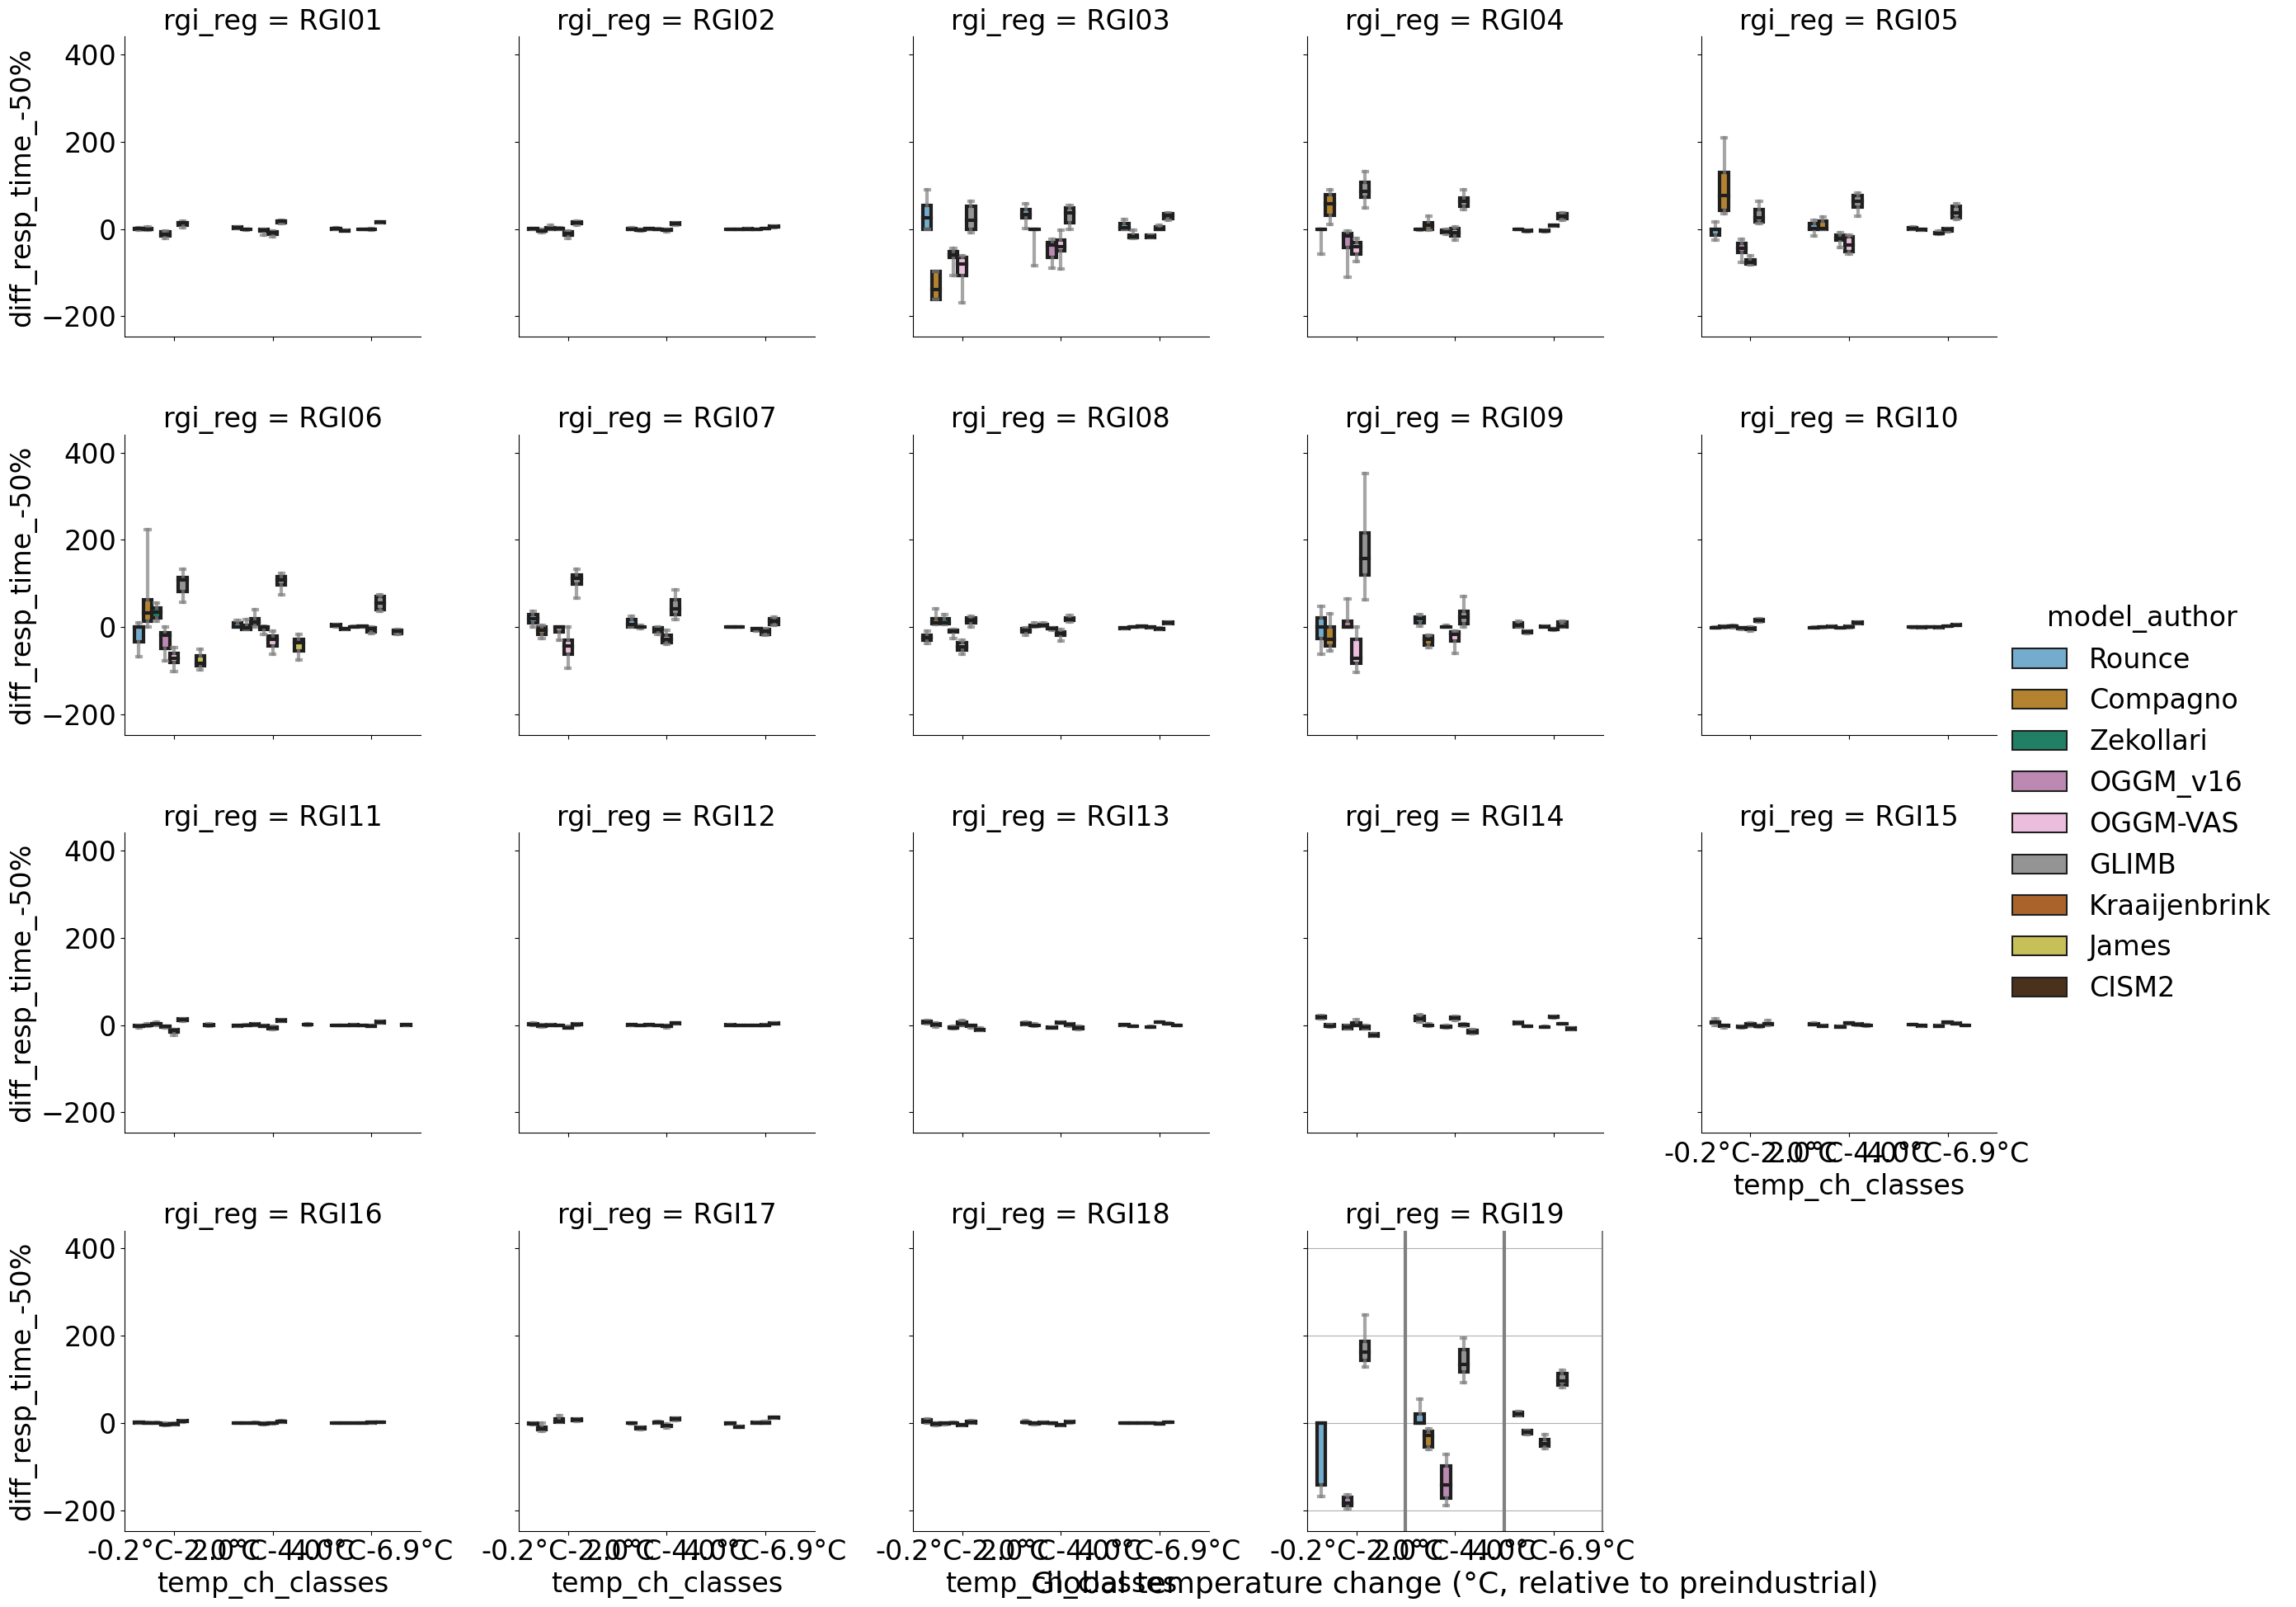

In [88]:

for anonym in ['']: #, '_anonym']:
    plt.figure(figsize=(30,40))
    plt.rc('font', size=24)  
    sns.catplot(data=pd_response_time_50_perc_loss_comp, hue='model_author', y='diff_resp_time_-50%',
                kind='box', col='rgi_reg',col_wrap=5,
                x='temp_ch_classes', palette=pal_models, saturation=0.6,
               hue_order=hue_order, dodge = True, #hue='ssp',
                                    fliersize=0, whis = [5,95], 
                                    #y = 'time', #hue_order = ['2040', '2100'],
                                    linewidth=3,
                                    capprops={'color':'grey', 'alpha':0.7},
                                    whiskerprops={'color':'grey', 'alpha':0.7},)
    plt.grid(axis='y')
    #plt.title('"Response" time differences (relative to median glacier model estimate)\n(condition: 25% of volume changes, def: year where 50% of change occurs, all RGI regions)')
    plt.ylabel(r'"Response" time differences (years)', fontsize=26)
    plt.xlabel('Global temperature change (°C, relative to preindustrial)', fontsize=26)
    for f in np.arange(0.5,3,1):
        plt.axvline(f, color= 'grey', ls='-', lw=3)

    ax = plt.gca()
    _leg = ax.get_legend()
    handles, labels = ax.get_legend_handles_labels()
   # _leg.remove()
    #n = len(hue_order)
    if anonym=='_anonym':
        leg = ax.legend(handles, labels_l_anonym, #title=f'{n} models',
                        loc='upper right', framealpha = 0.7, ncol=2, fontsize=20)
    else:
        leg = ax.legend(handles, labels_l, #title=f'{n} models',
                        loc='upper right', framealpha = 0.7, ncol=2, fontsize=20)
    plt.ylim([-120, 120])
    
    qs = pd_response_time_50_perc_loss_comp.groupby(['model_author', 'temp_ch_classes'])['diff_resp_time_-50%'].quantile([0.05,0.25,0.75,0.95]).loc[('Rounce', '-0.2°C-2.0°C')].values
    for p,q in enumerate(qs):
        perci = [5,25,75,95][p]
        if perci <=75:
            ax.text(-0.56,q-2,f'{perci}%', color = 'dimgrey', fontsize=18)
        else:
            ax.text(-0.56,q*0.98,f'{perci}%', color = 'dimgrey', fontsize=18)
    med_resp_time_temp_ch_classes.values
    for e,r in enumerate(med_resp_time_temp_ch_classes.values):
        text = f'median response time={int(r)} years'
        ax.text(e,0.-120,f'{text}', color = 'dimgrey', fontsize=18, ha='center', va='bottom')

    
    xlim0,xlim1 = ax.get_xlim()
    plt.xlim([-0.565,xlim1])
    plt.tight_layout()
    #plt.savefig(f'figures/3_response_time_glacier_model_diff_boxplot_5000yrs{anonym}.png')